In [141]:
# Group 5
# Neel Gandhi, Sunishka Jain, Daniel Shen, Julian Wu

# Imports
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
import math

In [142]:
# Import data
file = './clinvar_conflicting.csv'
data = pd.read_csv(file)

/Users/danielshen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [144]:
num_missing = data.isnull().sum()
percentage_missing = data.isnull().sum().apply(lambda x: x/data.shape[0]*100)
missing_data = pd.DataFrame({'Number of Missing':  num_missing,
                             'Percentage of Missing': percentage_missing})

missing_data['Percentage of Missing'].sort_values(ascending = False)

MOTIF_SCORE_CHANGE    99.996932
HIGH_INF_POS          99.996932
MOTIF_POS             99.996932
MOTIF_NAME            99.996932
DISTANCE              99.834325
SSR                   99.800577
CLNSIGINCL            99.743818
CLNDNINCL             99.743818
CLNDISDBINCL          99.743818
INTRON                86.495981
PolyPhen              61.962324
SIFT                  61.900963
BLOSUM62              60.739707
CLNVI                 57.570412
BAM_EDIT              50.958765
Codons                15.346383
Amino_acids           15.346383
Protein_position      15.271216
CDS_position          15.271216
EXON                  13.642081
cDNA_position         13.628275
LoFtool                6.462846
CADD_PHRED             1.675155
CADD_RAW               1.675155
MC                     1.297785
SYMBOL                 0.024544
BIOTYPE                0.024544
Feature_type           0.021476
Feature                0.021476
STRAND                 0.021476
Allele                 0.000000
CLNDISDB

In [41]:
drop_list = list(missing_data[missing_data['Percentage of Missing'] >= 65].index)
data.drop(drop_list,axis = 1, inplace=True)
data.isnull().sum()

CHROM                   0
POS                     0
REF                     0
ALT                     0
AF_ESP                  0
AF_EXAC                 0
AF_TGP                  0
CLNDISDB                0
CLNDN                   0
CLNHGVS                 0
CLNVC                   0
CLNVI               37529
MC                    846
ORIGIN                  0
CLASS                   0
Allele                  0
Consequence             0
IMPACT                  0
SYMBOL                 16
Feature_type           14
Feature                14
BIOTYPE                16
EXON                 8893
cDNA_position        8884
CDS_position         9955
Protein_position     9955
Amino_acids         10004
Codons              10004
STRAND                 14
BAM_EDIT            33219
SIFT                40352
PolyPhen            40392
LoFtool              4213
CADD_PHRED           1092
CADD_RAW             1092
BLOSUM62            39595
dtype: int64

## Bar plot for Genetic Variant Classification Conflicts
### From Class column,we are able to retrive number of consistent classifications and conflicting classifications.To understand difference of prediction made manually by two geneticist for problem of genetic variant classification

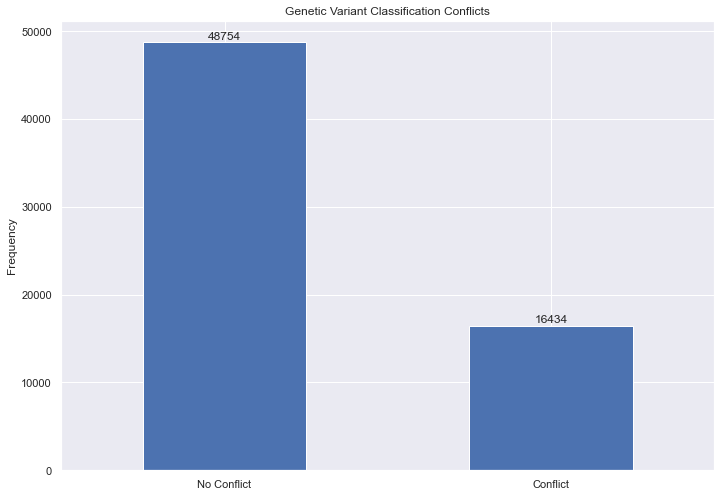

In [42]:
# Graph 1: Show the frequency of genetic variant classification conflicts

ax = data["CLASS"].value_counts().plot.bar(title="Genetic Variant Classification Conflicts")
plt.ylabel("Frequency")
labels = ["No Conflict", "Conflict"]
plt.xticks([0, 1], labels, rotation='horizontal')

# Show the count above each bar
# Adapted from: https://stackoverflow.com/questions/66283061/how-to-add-the-total-count-on-top-of-bar-graph-using-python
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

## Distribution of variants by chromosome/organelle

### Chromosome manifests location of variant and play a pivotal role for prediction of genetic variant.There are total 24 types of chromosomes numbered from 1 to 22 and last two named as X and MT


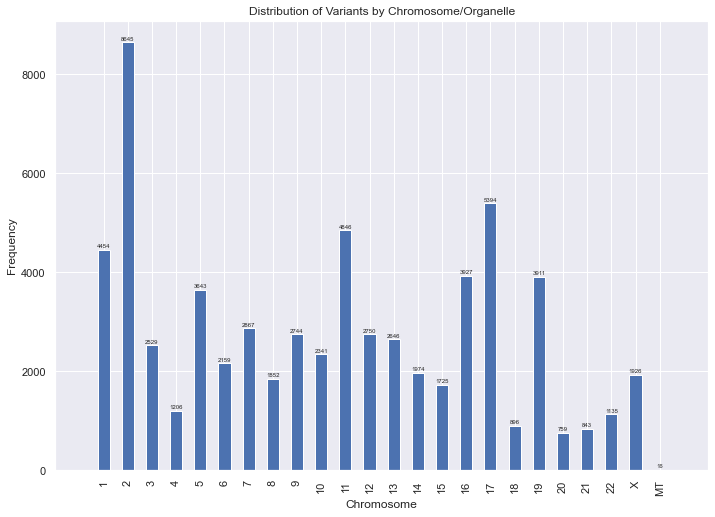

In [43]:
# Graph 2 - Distribution of variants by chromosome/organelle

chromosomes = data['CHROM']

# Clean up data
dict = {}
for c in chromosomes:
    c = str(c)
    if c in dict:
        dict[c] += 1
    else:
        dict[c] = 1

df = pd.DataFrame(columns=['Chromosome', 'Count'])

for key in dict:
    df.loc[len(df.index)] = [key, dict[key]]

# Make the graph look pretty
ax = df.plot.bar(x='Chromosome', width=0.5, legend=False,
                title="Distribution of Variants by Chromosome/Organelle")
ax.margins(.05)
ax.set_xlim([-2, 25])
plt.ylabel("Frequency")

# Show the count above each bar
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va='bottom',
                fontsize=6)
plt.show()

## Distribution of Point Mutations

### REF and ALT variables are for capture variant alleles,where they detect genetic variant transistion from REF to ALT referred as Point Substitution Mutations and their pattern of transition is plotted using bar plot

Text(0.5, 1.0, 'Distribution of Point Substitution Mutations')

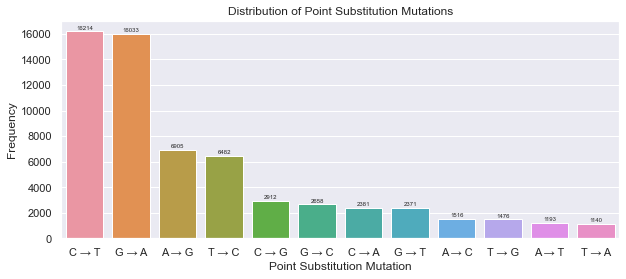

In [44]:
# Graph 3: Distribution of Point Mutations

ref = data['REF']
alt = data['ALT']

# Clean up data (getting rid any lines with multi-base mutations)
dict = {}

for i in range(len(ref)):
    if len(ref[i]) == 1 and len(alt[i]) == 1:
        key = str(ref[i]) + " → " + str(alt[i])
        if key in dict:
            dict[key] += 1
        else:
            dict[key] = 1

df = pd.DataFrame(columns=['Point Substitution Mutation', 'Count'])
for key in dict:
    df.loc[len(df.index)] = [key, dict[key]]

# Plot the data
plt.figure(figsize=(10, 4))

plots = sns.barplot(x='Point Substitution Mutation', y='Count', 
                    data=df, order=df.sort_values('Count', 
                    ascending=False)['Point Substitution Mutation'])

# Show the count above each bar
for rect in plots.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    plots.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va='bottom',
                fontsize=6)

# Make the graph look pretty
plt.ylabel("Frequency")
plt.xticks(rotation='horizontal')
plt.title("Distribution of Point Substitution Mutations")


## Forward & Backward Strands

### Strands are categorical classified as Forward Strand and Backward Strand.Their count is depicted by bar plot

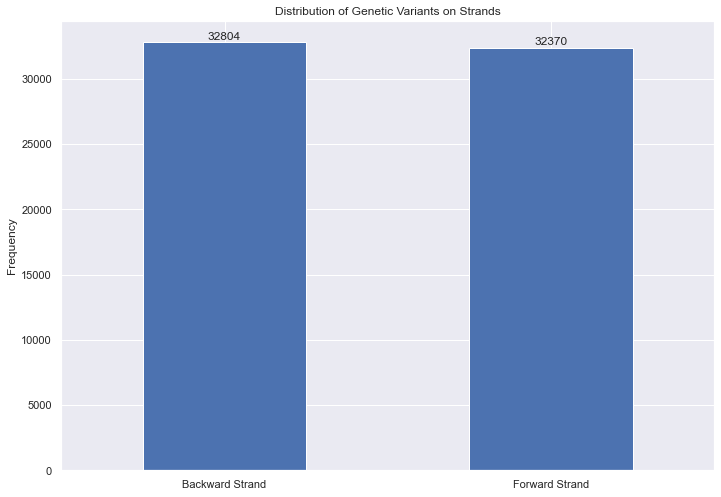

In [45]:
# Graph 4: Forward & Backward Strands

strand = data['STRAND']

ax = strand.value_counts().plot.bar(title="Distribution of Genetic Variants on Strands")
plt.ylabel("Frequency")
labels = ["Backward Strand", "Forward Strand"]
plt.xticks([0, 1], labels, rotation='horizontal')

# Show the count above each bar
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()


In [46]:
def cleanVariantName(name):
    parts = name.split("&")

    for i in range(len(parts)):
        parts[i] = parts[i].capitalize()
    
    name = ' & '.join(parts)

    name = name.replace("_variant", "")
    parts = name.split('_')
    for i in range(len(parts)):
        parts[i] = parts[i][0].upper() + parts[i][1:]
    
    return ' '.join(parts)


## Top 10 most common variant types

### Most common variant type represented by Consequence column are depicted by horizontal bar plot

Text(0.5, 1.0, 'Top 10 Most Common Variant Types')

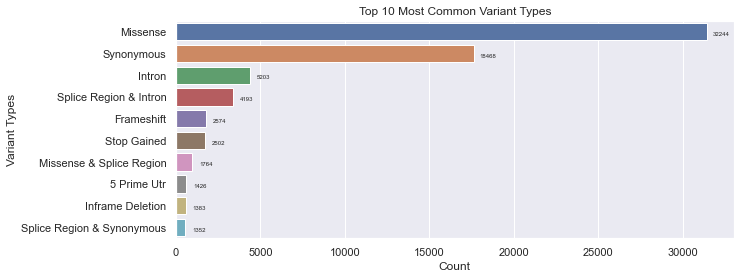

In [47]:

# Graph 5: Top 10 most common variant types

variantTypes = data['Consequence']

# Clean up data and populate df
dict = {}

for i in range(len(variantTypes)):
    key = str(variantTypes[i])
    key = cleanVariantName(key) # Get a cleaner name for the graph
    if key in dict:
        dict[key] += 1
    else:
        dict[key] = 1

df = pd.DataFrame(columns=['Variant Types', 'Count'])
for key in dict:
    df.loc[len(df.index)] = [key, dict[key]]

# Plot the data
plt.figure(figsize=(10, 4))

plots = sns.barplot(x='Count', y='Variant Types', 
                    data=df, 
                    order=df.sort_values('Count', ascending=False).iloc[:10]['Variant Types'])

# Show the count next to each bar
for rect in plots.patches:
    y_value = rect.get_y() + (rect.get_height() / 1.2)
    x_value = rect.get_width() + 800
    space = 1
    label = "{:.0f}".format(x_value)
    plots.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va='bottom',
                fontsize=6)

# Make the graph look pretty
plt.ylabel("Variant Types")
plt.xticks(rotation='horizontal')
plt.title("Top 10 Most Common Variant Types")



 ## Correlation Matrix for understanding correlation between AF_ESP,AF_EXAC,AF_TGP
 
 ### AF_ESP,AF_EXAC and AF_TGP are variables that capture the allele frequency and correlated with each other.Understanding their correlation would help to dichotomize them into various classes for task of classification

<AxesSubplot:>

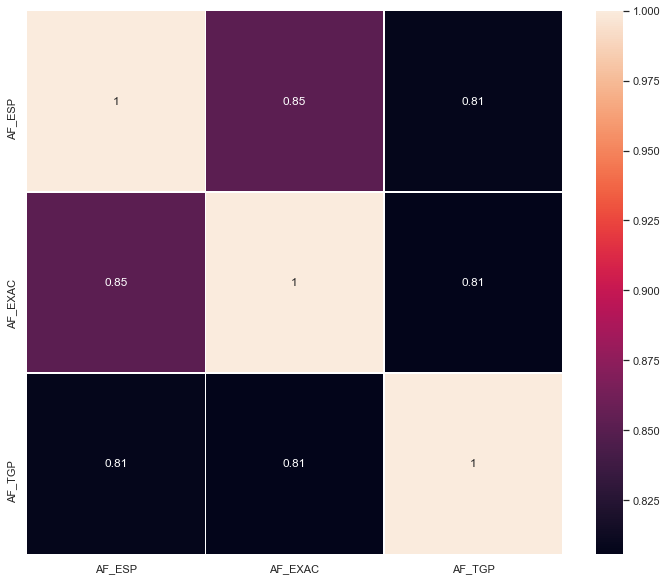

In [48]:
#Graph 6: Correlation Matrix for understanding correlation between AF_ESP,AF_EXAC,AF_TGP
plt.figure(figsize = (12, 10))
sns.heatmap(data[data.columns[3:7]].corr(), annot = True, linewidths=.5)

## Stacked Bar Chart for detection of PolyPhen in four categories 
### PolyPhen prediction score for classification of genetic variant into benign ,damaging and unknown and their respective classification as consistent and conflicting classification. 

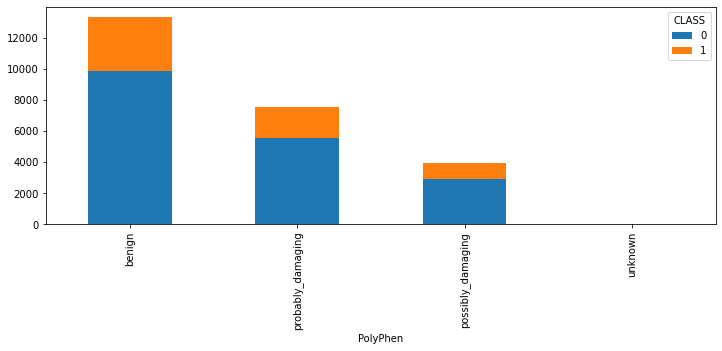

In [13]:
#Graph 7: Stack bar Chart for detection of PolyPhen in four categories 
polyphen_ct = pd.crosstab(data['PolyPhen'], data['CLASS'], margins=True)
polyphen_ct.drop('All', axis=0, inplace=True)

polyphen_ct = polyphen_ct.sort_values(by='All', ascending=False)
polyphen_ct.drop('All', axis=1, inplace=True)

polyphen_ct.plot.bar(stacked=True, figsize=(12, 4));


## Correlation between CADD_PHRED and CADD_RAW with respect to CLASS
### Different scores of deleteriousness are represented by CADD_PHRED and CADD_RAW for given scatter correlation plot with their respective class classification


Text(0.5, 1.0, 'CADD_PHRED vs CADD_RAW Based on Conflicting Classification')

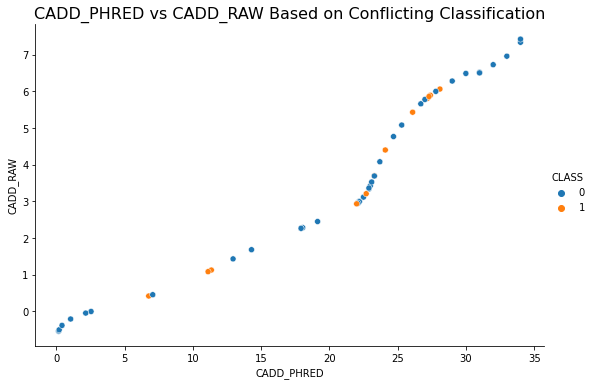

In [14]:
#Graph 8: Correlation between CADD_PHRED and CADD_RAW with respect to CLASS
sns.relplot(data=data.head(50), x='CADD_PHRED', y='CADD_RAW', hue='CLASS', height=5, aspect=1.5)
plt.xlabel('CADD_PHRED')
plt.ylabel('CADD_RAW')
plt.title('CADD_PHRED vs CADD_RAW Based on Conflicting Classification', fontsize=16)

## Top 15 most common gene SYMBOL
### We have plotted top 15 gene symbols present in our dataset.In our given dataset,'TTN' is most used gene symbol for problem of genetic variant classification problem

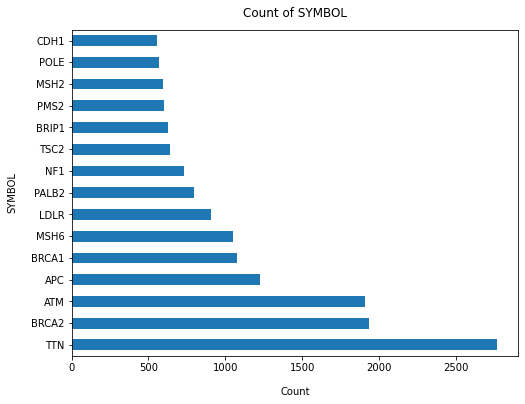

In [15]:
# Graph 9: Top 15 most common SYMBOL
data['SYMBOL'].value_counts().nlargest(15).plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("SYMBOL", labelpad=14)
plt.title("Count of SYMBOL", y=1.02);


## WordCloud Representation of Diseases

### CLNDN using the identifiers from CLNDISDB is important metric for disease name identification.Here,we have cleaned and processed CLNDN column to generate wordcloud of top 100 disease responsible for genetic variant classification.

In [145]:
# Graph 10 : WordCloud Representation of Diseases
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
disease_names = data['CLNDN'].str.split(pat = '|', expand = True)
disease_names.head()
top_100_disease = disease_names.apply(pd.value_counts).sum(axis=1).sort_values(ascending = False)[0:10]
text = " ".join(i for i in top_100_disease_list)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

## Loss of Function tolerance score for loss of function variants depicted using Histogram

###  Loss of Function tolerance score derived from loss of function variants is indicative of fact that most Loss of Function tolerance score lie in range of 0-0.2 rather than having erratic distribution 

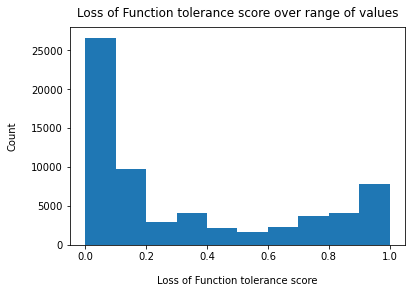

In [18]:
# Graph 11 : Loss of Function tolerance score for loss of function variants depicted using Histogram
data['LoFtool'].fillna(data['LoFtool'].median(), inplace=True)
plt.hist(data['LoFtool'])
plt.xlabel("Loss of Function tolerance score", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Loss of Function tolerance score over range of values", y=1.02);

## Impact type/intensity for the top 10 variants

### Plot demonstrates impact of particular genetic variants derived through consequence column 

<ipython-input-19-553d1b7e7cc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impact['Consequence'] = df_impact['Consequence'].apply(lambda x: cleanVariantName(x))


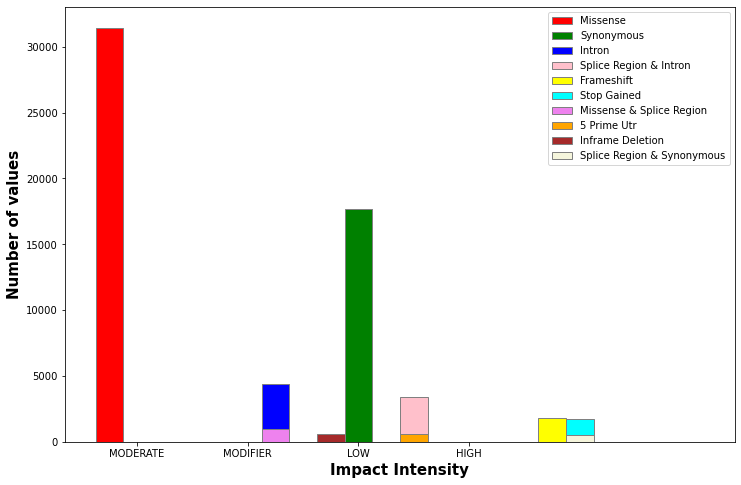

In [19]:
# Graph 12: Impact type/intensity for the top 10 variants
import numpy as np
df_impact = data[['Consequence','IMPACT']]
df_impact['Consequence'] = df_impact['Consequence'].apply(lambda x: cleanVariantName(x))

sorted_df = df.sort_values('Count', ascending=False)
sorted_df.reset_index(inplace=True)

categories = df_impact['IMPACT'].unique()

# print(sorted_df)
category_list = []

for var_num in range(10):
  current_variant = sorted_df['Variant Types'].iloc[var_num]
  variant_impact = df_impact.loc[df_impact['Consequence'] == current_variant,'IMPACT']
  my_list = []
  # print(variant_impact)
  for impact_category in categories: 
    my_list.append(variant_impact.loc[variant_impact == impact_category].count())
  category_list.append(my_list)

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(categories))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]

# Make the plot
plt.bar(br1, category_list[0], color ='r', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[0])
plt.bar(br2, category_list[1], color ='g', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[1])
plt.bar(br3, category_list[2], color ='b', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[2])
plt.bar(br4, category_list[3], color ='pink', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[3])
plt.bar(br5, category_list[4], color ='yellow', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[4])
plt.bar(br6, category_list[5], color ='cyan', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[5])
plt.bar(br7, category_list[6], color ='violet', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[6])
plt.bar(br8, category_list[7], color ='orange', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[7])
plt.bar(br9, category_list[8], color ='brown', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[8])
plt.bar(br10, category_list[9], color ='beige', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[9])
 
# Adding Xticks
plt.xlabel('Impact Intensity', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(categories))],
        ['MODERATE', 'MODIFIER', 'LOW', 'HIGH'])
 
plt.legend()
plt.show()


# Assigning Dummy Variables to Categorical Variables

In [146]:
# #Creating an initial correlation matrix to identify features that might be relevant
# corr_matrix = data.corr()
# print(corr_matrix)
# sns.heatmap(corr_matrix, annot=True)
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# plt.show()

In [147]:
data['CLNVC'].unique()

array(['single_nucleotide_variant', 'Deletion', 'Duplication', 'Indel',
       'Inversion', 'Insertion', 'Microsatellite'], dtype=object)

In [148]:
#Dummy variables for CLNVC feature, arbitrary assignment of 0,1,2,3,4,5,6 for the different variant types

data.loc[data['CLNVC'] == "single_nucleotide_variant", "CLNVC"] = 0
data.loc[data['CLNVC'] == "Deletion", "CLNVC"] = 1
data.loc[data['CLNVC'] == "Duplication", "CLNVC"] = 2
data.loc[data['CLNVC'] == "Indel", "CLNVC"] = 3
data.loc[data['CLNVC'] == "Inversion", "CLNVC"] = 4
data.loc[data['CLNVC'] == "Insertion", "CLNVC"] = 5
data.loc[data['CLNVC'] == "Microsatellite", "CLNVC"] = 6

data['CLNVC'].unique()


array([0, 1, 2, 3, 4, 5, 6], dtype=object)

In [149]:
data['CLNVC']

0        0
1        0
2        0
3        0
4        0
        ..
65183    0
65184    0
65185    0
65186    0
65187    0
Name: CLNVC, Length: 65188, dtype: object

In [150]:
data['IMPACT'].unique()

array(['MODERATE', 'MODIFIER', 'LOW', 'HIGH'], dtype=object)

In [151]:
#Dummy variables for IMPACT feature, which is 
data['IMPACT'].unique()

data.loc[data['IMPACT'] == "MODERATE", "IMPACT"] = 0
data.loc[data['IMPACT'] == "MODIFIER", "IMPACT"] = 1
data.loc[data['IMPACT'] == "LOW", "IMPACT"] = 2
data.loc[data['IMPACT'] == "HIGH", "IMPACT"] = 3

data['IMPACT'].unique()

array([0, 1, 2, 3], dtype=object)

In [152]:
data['IMPACT']

0        0
1        0
2        0
3        0
4        0
        ..
65183    2
65184    0
65185    2
65186    2
65187    0
Name: IMPACT, Length: 65188, dtype: object

In [153]:
#Dummy variables for the SYMBOL feature, which are just the names of the genes 
gene_names = data['SYMBOL'].unique()
print(gene_names)
print(len(gene_names))

#Arbitrarily assigning each of the 2329 genes to a number
for i in range(0, len(gene_names)):
    data.loc[data['SYMBOL'] == gene_names[i], "SYMBOL"] = i

['B3GALT6' 'TMEM240' 'GNB1' ... 'DKC1' 'RAB39B' 'CLIC2']
2329


In [154]:
#Checking to see that it worked
data['SYMBOL'].unique()

array([0, 1, 2, ..., 2326, 2327, 2328], dtype=object)

In [155]:
data['SYMBOL']

0           0
1           1
2           2
3           3
4           3
         ... 
65183    1315
65184    1315
65185    1315
65186    2327
65187    2328
Name: SYMBOL, Length: 65188, dtype: object

In [156]:
#EXON, which are fractions (exon #/total #)
#Since they're all strings, we want to convert them into floats between 0 and 1
exon_locations = data['EXON'].unique()
print(exon_locations)
print(len(exon_locations))

['1/1' '4/4' '6/12' ... '38/45' '39/45' '30/53']
3265


In [157]:
#Converting all the unique string forms of the fractions into floats 
for i in range(0, len(exon_locations)):
#     print(exon_locations[i])
#     print(type(exon_locations[i]))
    #Not going to touch the NaNs for now
    if(isinstance(exon_locations[i], float)):
        pass
    else:
        data.loc[data['EXON'] == exon_locations[i], "EXON"] = float(Fraction(exon_locations[i]))
        

1/1
<class 'str'>
4/4
<class 'str'>
6/12
<class 'str'>
1/7
<class 'str'>
9/17
<class 'str'>
15/17
<class 'str'>
27/30
<class 'str'>
26/30
<class 'str'>
24/30
<class 'str'>
21/30
<class 'str'>
19/30
<class 'str'>
17/30
<class 'str'>
15/30
<class 'str'>
14/30
<class 'str'>
9/30
<class 'str'>
3/30
<class 'str'>
2/30
<class 'str'>
20/23
<class 'str'>
23/23
<class 'str'>
5/5
<class 'str'>
5/9
<class 'str'>
9/9
<class 'str'>
6/6
<class 'str'>
9/11
<class 'str'>
3/11
<class 'str'>
12/12
<class 'str'>
4/20
<class 'str'>
5/20
<class 'str'>
3/18
<class 'str'>
6/18
<class 'str'>
8/18
<class 'str'>
10/18
<class 'str'>
18/18
<class 'str'>
2/8
<class 'str'>
6/8
<class 'str'>
7/8
<class 'str'>
13/17
<class 'str'>
11/17
<class 'str'>
5/17
<class 'str'>
25/28
<class 'str'>
10/28
<class 'str'>
5/8
<class 'str'>
1/8
<class 'str'>
13/15
<class 'str'>
22/24
<class 'str'>
13/24
<class 'str'>
3/24
<class 'str'>
8/8
<class 'str'>
5/12
<class 'str'>
7/12
<class 'str'>
9/12
<class 'str'>
10/12
<class 'str'>
11/

5/51
<class 'str'>
6/51
<class 'str'>
23/51
<class 'str'>
25/51
<class 'str'>
29/51
<class 'str'>
30/51
<class 'str'>
48/51
<class 'str'>
53/54
<class 'str'>
42/54
<class 'str'>
37/54
<class 'str'>
23/54
<class 'str'>
21/54
<class 'str'>
9/10
<class 'str'>
4/34
<class 'str'>
9/19
<class 'str'>
12/40
<class 'str'>
32/40
<class 'str'>
37/40
<class 'str'>
38/40
<class 'str'>
7/11
<class 'str'>
47/53
<class 'str'>
17/53
<class 'str'>
13/53
<class 'str'>
7/53
<class 'str'>
5/18
<class 'str'>
7/18
<class 'str'>
1/9
<class 'str'>
8/9
<class 'str'>
44/48
<class 'str'>
42/48
<class 'str'>
33/48
<class 'str'>
28/48
<class 'str'>
26/48
<class 'str'>
24/48
<class 'str'>
23/48
<class 'str'>
21/48
<class 'str'>
2/48
<class 'str'>
7/52
<class 'str'>
9/52
<class 'str'>
22/52
<class 'str'>
32/52
<class 'str'>
35/52
<class 'str'>
43/52
<class 'str'>
46/52
<class 'str'>
52/52
<class 'str'>
17/20
<class 'str'>
9/20
<class 'str'>
2/21
<class 'str'>
42/44
<class 'str'>
41/44
<class 'str'>
39/44
<class 'str'

3/66
<class 'str'>
4/66
<class 'str'>
30/66
<class 'str'>
36/66
<class 'str'>
43/66
<class 'str'>
64/67
<class 'str'>
56/67
<class 'str'>
44/67
<class 'str'>
17/67
<class 'str'>
11/35
<class 'str'>
12/35
<class 'str'>
22/35
<class 'str'>
32/35
<class 'str'>
2/20
<class 'str'>
7/20
<class 'str'>
20/20
<class 'str'>
21/21
<class 'str'>
18/21
<class 'str'>
31/35
<class 'str'>
3/14
<class 'str'>
3/33
<class 'str'>
4/33
<class 'str'>
20/33
<class 'str'>
24/33
<class 'str'>
26/33
<class 'str'>
4/18
<class 'str'>
7/32
<class 'str'>
52/56
<class 'str'>
27/56
<class 'str'>
17/56
<class 'str'>
10/56
<class 'str'>
2/56
<class 'str'>
27/41
<class 'str'>
18/41
<class 'str'>
39/39
<class 'str'>
33/39
<class 'str'>
28/39
<class 'str'>
12/39
<class 'str'>
6/39
<class 'str'>
4/39
<class 'str'>
3/39
<class 'str'>
24/27
<class 'str'>
33/35
<class 'str'>
28/35
<class 'str'>
25/35
<class 'str'>
19/35
<class 'str'>
18/35
<class 'str'>
17/35
<class 'str'>
15/35
<class 'str'>
13/35
<class 'str'>
8/35
<class '

30/30
<class 'str'>
29/30
<class 'str'>
28/30
<class 'str'>
23/30
<class 'str'>
12/30
<class 'str'>
11/30
<class 'str'>
10/30
<class 'str'>
5/30
<class 'str'>
20/22
<class 'str'>
11/49
<class 'str'>
15/49
<class 'str'>
24/49
<class 'str'>
26/49
<class 'str'>
27/49
<class 'str'>
31/49
<class 'str'>
34/49
<class 'str'>
40/49
<class 'str'>
44/49
<class 'str'>
48/49
<class 'str'>
49/49
<class 'str'>
40/58
<class 'str'>
12/58
<class 'str'>
28/29
<class 'str'>
101/102
<class 'str'>
100/102
<class 'str'>
93/102
<class 'str'>
92/102
<class 'str'>
89/102
<class 'str'>
87/102
<class 'str'>
85/102
<class 'str'>
84/102
<class 'str'>
82/102
<class 'str'>
80/102
<class 'str'>
79/102
<class 'str'>
78/102
<class 'str'>
77/102
<class 'str'>
72/102
<class 'str'>
70/102
<class 'str'>
69/102
<class 'str'>
68/102
<class 'str'>
67/102
<class 'str'>
65/102
<class 'str'>
62/102
<class 'str'>
61/102
<class 'str'>
60/102
<class 'str'>
59/102
<class 'str'>
58/102
<class 'str'>
56/102
<class 'str'>
55/102
<class 

18/31
<class 'str'>
30/38
<class 'str'>
24/38
<class 'str'>
21/38
<class 'str'>
20/38
<class 'str'>
19/38
<class 'str'>
18/49
<class 'str'>
32/49
<class 'str'>
42/52
<class 'str'>
34/52
<class 'str'>
31/52
<class 'str'>
30/52
<class 'str'>
27/52
<class 'str'>
14/52
<class 'str'>
11/52
<class 'str'>
5/52
<class 'str'>
3/52
<class 'str'>
2/36
<class 'str'>
9/36
<class 'str'>
11/36
<class 'str'>
12/36
<class 'str'>
15/36
<class 'str'>
18/36
<class 'str'>
24/36
<class 'str'>
30/36
<class 'str'>
34/36
<class 'str'>
33/38
<class 'str'>
29/38
<class 'str'>
1/38
<class 'str'>
3/51
<class 'str'>
8/51
<class 'str'>
9/51
<class 'str'>
17/51
<class 'str'>
22/51
<class 'str'>
24/51
<class 'str'>
35/51
<class 'str'>
37/51
<class 'str'>
43/51
<class 'str'>
46/51
<class 'str'>
54/54
<class 'str'>
51/54
<class 'str'>
44/54
<class 'str'>
43/54
<class 'str'>
40/54
<class 'str'>
38/54
<class 'str'>
36/54
<class 'str'>
30/54
<class 'str'>
28/54
<class 'str'>
25/54
<class 'str'>
24/54
<class 'str'>
19/54
<c

26/51
<class 'str'>
16/51
<class 'str'>
15/51
<class 'str'>
11/51
<class 'str'>
2/51
<class 'str'>
1/33
<class 'str'>
14/43
<class 'str'>
1/48
<class 'str'>
4/48
<class 'str'>
41/48
<class 'str'>
38/52
<class 'str'>
42/75
<class 'str'>
45/75
<class 'str'>
48/75
<class 'str'>
58/75
<class 'str'>
65/75
<class 'str'>
67/75
<class 'str'>
71/75
<class 'str'>
23/44
<class 'str'>
14/40
<class 'str'>
3/40
<class 'str'>
5/41
<class 'str'>
7/36
<class 'str'>
8/36
<class 'str'>
13/36
<class 'str'>
16/36
<class 'str'>
23/36
<class 'str'>
25/36
<class 'str'>
28/36
<class 'str'>
29/36
<class 'str'>
33/36
<class 'str'>
35/36
<class 'str'>
48/48
<class 'str'>
47/48
<class 'str'>
35/48
<class 'str'>
20/48
<class 'str'>
19/48
<class 'str'>
17/48
<class 'str'>
8/48
<class 'str'>
7/48
<class 'str'>
5/48
<class 'str'>
2/29
<class 'str'>
31/32
<class 'str'>
2/106
<class 'str'>
4/106
<class 'str'>
7/106
<class 'str'>
58/106
<class 'str'>
59/106
<class 'str'>
82/106
<class 'str'>
83/106
<class 'str'>
84/106
<

228/363
<class 'str'>
227/363
<class 'str'>
226/363
<class 'str'>
225/363
<class 'str'>
224/363
<class 'str'>
221/363
<class 'str'>
220/363
<class 'str'>
219/363
<class 'str'>
217/363
<class 'str'>
212/363
<class 'str'>
211/363
<class 'str'>
210/363
<class 'str'>
209/363
<class 'str'>
208/363
<class 'str'>
207/363
<class 'str'>
206/363
<class 'str'>
205/363
<class 'str'>
204/363
<class 'str'>
203/363
<class 'str'>
202/363
<class 'str'>
200/363
<class 'str'>
193/363
<class 'str'>
191/363
<class 'str'>
183/363
<class 'str'>
182/363
<class 'str'>
180/363
<class 'str'>
174/363
<class 'str'>
173/363
<class 'str'>
171/363
<class 'str'>
169/363
<class 'str'>
168/363
<class 'str'>
166/363
<class 'str'>
162/363
<class 'str'>
158/363
<class 'str'>
157/363
<class 'str'>
156/363
<class 'str'>
155/363
<class 'str'>
154/363
<class 'str'>
153/363
<class 'str'>
152/363
<class 'str'>
151/363
<class 'str'>
150/363
<class 'str'>
149/363
<class 'str'>
146/363
<class 'str'>
144/363
<class 'str'>
143/363
<c

19/104
<class 'str'>
18/104
<class 'str'>
24/66
<class 'str'>
6/41
<class 'str'>
4/41
<class 'str'>
1/66
<class 'str'>
146/146
<class 'str'>
144/146
<class 'str'>
143/146
<class 'str'>
142/146
<class 'str'>
141/146
<class 'str'>
140/146
<class 'str'>
139/146
<class 'str'>
138/146
<class 'str'>
137/146
<class 'str'>
136/146
<class 'str'>
135/146
<class 'str'>
134/146
<class 'str'>
133/146
<class 'str'>
131/146
<class 'str'>
130/146
<class 'str'>
129/146
<class 'str'>
128/146
<class 'str'>
127/146
<class 'str'>
126/146
<class 'str'>
125/146
<class 'str'>
124/146
<class 'str'>
123/146
<class 'str'>
122/146
<class 'str'>
121/146
<class 'str'>
120/146
<class 'str'>
119/146
<class 'str'>
118/146
<class 'str'>
117/146
<class 'str'>
116/146
<class 'str'>
115/146
<class 'str'>
114/146
<class 'str'>
112/146
<class 'str'>
111/146
<class 'str'>
110/146
<class 'str'>
109/146
<class 'str'>
108/146
<class 'str'>
107/146
<class 'str'>
106/146
<class 'str'>
105/146
<class 'str'>
104/146
<class 'str'>
1

In [158]:
float_exon_locations = data['EXON'].unique()
print(len(float_exon_locations))

2102


In [159]:
print(data['EXON'])

0               1
1               1
2             0.5
3        0.142857
4        0.142857
           ...   
65183    0.538462
65184    0.538462
65185    0.307692
65186           1
65187    0.857143
Name: EXON, Length: 65188, dtype: object


In [160]:
print(type(data.iloc[0]['EXON']))

<class 'float'>


In [161]:
#INTRONS, same concept as exons
intron_locations = data['INTRON'].unique()
print(intron_locations)
print(len(intron_locations))

[nan '6/27' '8/17' ... '32/52' '12/47' '2/47']
1930


In [162]:
#Converting all the unique string forms of the fractions into floats 
for i in range(0, len(intron_locations)):
#     print(intron_locations[i])
#     print(type(intron_locations[i]))
    #Not going to touch the NaNs for now
    if(isinstance(intron_locations[i], float)):
        pass
    else:
        data.loc[data['INTRON'] == intron_locations[i], "INTRON"] = float(Fraction(intron_locations[i]))
        

nan
<class 'float'>
6/27
<class 'str'>
8/17
<class 'str'>
3/20
<class 'str'>
24/24
<class 'str'>
6/38
<class 'str'>
16/38
<class 'str'>
20/38
<class 'str'>
25/38
<class 'str'>
26/38
<class 'str'>
28/38
<class 'str'>
32/38
<class 'str'>
34/38
<class 'str'>
4/8
<class 'str'>
1/6
<class 'str'>
3/6
<class 'str'>
5/5
<class 'str'>
2/5
<class 'str'>
1/16
<class 'str'>
2/16
<class 'str'>
6/16
<class 'str'>
10/16
<class 'str'>
13/16
<class 'str'>
14/16
<class 'str'>
29/29
<class 'str'>
14/29
<class 'str'>
13/29
<class 'str'>
11/29
<class 'str'>
3/29
<class 'str'>
2/29
<class 'str'>
9/21
<class 'str'>
7/21
<class 'str'>
2/21
<class 'str'>
6/22
<class 'str'>
3/48
<class 'str'>
4/48
<class 'str'>
6/48
<class 'str'>
19/48
<class 'str'>
22/48
<class 'str'>
30/48
<class 'str'>
36/48
<class 'str'>
38/48
<class 'str'>
45/48
<class 'str'>
1/8
<class 'str'>
5/8
<class 'str'>
1/2
<class 'str'>
4/19
<class 'str'>
10/19
<class 'str'>
1/17
<class 'str'>
9/17
<class 'str'>
17/17
<class 'str'>
6/19
<class 'st

2/8
<class 'str'>
15/21
<class 'str'>
22/32
<class 'str'>
24/32
<class 'str'>
29/32
<class 'str'>
3/13
<class 'str'>
11/19
<class 'str'>
8/31
<class 'str'>
3/4
<class 'str'>
47/55
<class 'str'>
16/55
<class 'str'>
6/28
<class 'str'>
8/28
<class 'str'>
9/28
<class 'str'>
11/28
<class 'str'>
12/28
<class 'str'>
16/28
<class 'str'>
20/28
<class 'str'>
22/28
<class 'str'>
23/28
<class 'str'>
2/13
<class 'str'>
13/13
<class 'str'>
13/17
<class 'str'>
2/4
<class 'str'>
15/15
<class 'str'>
38/40
<class 'str'>
36/40
<class 'str'>
34/40
<class 'str'>
24/40
<class 'str'>
5/40
<class 'str'>
36/38
<class 'str'>
33/38
<class 'str'>
27/38
<class 'str'>
23/38
<class 'str'>
22/38
<class 'str'>
15/38
<class 'str'>
14/38
<class 'str'>
8/38
<class 'str'>
5/38
<class 'str'>
4/38
<class 'str'>
2/38
<class 'str'>
25/26
<class 'str'>
24/26
<class 'str'>
21/26
<class 'str'>
19/26
<class 'str'>
18/26
<class 'str'>
14/26
<class 'str'>
13/26
<class 'str'>
10/26
<class 'str'>
8/26
<class 'str'>
2/26
<class 'str'>

12/77
<class 'str'>
20/77
<class 'str'>
47/77
<class 'str'>
57/77
<class 'str'>
60/77
<class 'str'>
61/77
<class 'str'>
65/77
<class 'str'>
69/77
<class 'str'>
73/77
<class 'str'>
74/77
<class 'str'>
13/23
<class 'str'>
12/23
<class 'str'>
18/92
<class 'str'>
22/24
<class 'str'>
21/24
<class 'str'>
18/24
<class 'str'>
13/24
<class 'str'>
9/24
<class 'str'>
12/38
<class 'str'>
24/38
<class 'str'>
9/23
<class 'str'>
10/23
<class 'str'>
17/23
<class 'str'>
22/23
<class 'str'>
23/23
<class 'str'>
17/27
<class 'str'>
27/39
<class 'str'>
23/39
<class 'str'>
17/39
<class 'str'>
14/39
<class 'str'>
3/39
<class 'str'>
26/33
<class 'str'>
18/33
<class 'str'>
65/65
<class 'str'>
63/65
<class 'str'>
58/65
<class 'str'>
57/65
<class 'str'>
54/65
<class 'str'>
51/65
<class 'str'>
50/65
<class 'str'>
48/65
<class 'str'>
47/65
<class 'str'>
44/65
<class 'str'>
43/65
<class 'str'>
41/65
<class 'str'>
36/65
<class 'str'>
32/65
<class 'str'>
29/65
<class 'str'>
28/65
<class 'str'>
27/65
<class 'str'>
25/

8/78
<class 'str'>
1/78
<class 'str'>
361/362
<class 'str'>
358/362
<class 'str'>
357/362
<class 'str'>
356/362
<class 'str'>
355/362
<class 'str'>
353/362
<class 'str'>
352/362
<class 'str'>
351/362
<class 'str'>
350/362
<class 'str'>
349/362
<class 'str'>
347/362
<class 'str'>
343/362
<class 'str'>
337/362
<class 'str'>
336/362
<class 'str'>
330/362
<class 'str'>
329/362
<class 'str'>
328/362
<class 'str'>
326/362
<class 'str'>
325/362
<class 'str'>
324/362
<class 'str'>
323/362
<class 'str'>
319/362
<class 'str'>
318/362
<class 'str'>
314/362
<class 'str'>
312/362
<class 'str'>
311/362
<class 'str'>
300/362
<class 'str'>
294/362
<class 'str'>
293/362
<class 'str'>
291/362
<class 'str'>
286/362
<class 'str'>
282/362
<class 'str'>
281/362
<class 'str'>
279/362
<class 'str'>
277/362
<class 'str'>
276/362
<class 'str'>
275/362
<class 'str'>
272/362
<class 'str'>
271/362
<class 'str'>
269/362
<class 'str'>
264/362
<class 'str'>
262/362
<class 'str'>
259/362
<class 'str'>
258/362
<class '

16/40
<class 'str'>
10/40
<class 'str'>
23/65
<class 'str'>
45/65
<class 'str'>
46/65
<class 'str'>
52/65
<class 'str'>
53/65
<class 'str'>
59/65
<class 'str'>
61/65
<class 'str'>
143/145
<class 'str'>
138/145
<class 'str'>
130/145
<class 'str'>
128/145
<class 'str'>
121/145
<class 'str'>
117/145
<class 'str'>
116/145
<class 'str'>
113/145
<class 'str'>
110/145
<class 'str'>
105/145
<class 'str'>
103/145
<class 'str'>
101/145
<class 'str'>
91/145
<class 'str'>
90/145
<class 'str'>
89/145
<class 'str'>
84/145
<class 'str'>
81/145
<class 'str'>
80/145
<class 'str'>
76/145
<class 'str'>
75/145
<class 'str'>
73/145
<class 'str'>
72/145
<class 'str'>
69/145
<class 'str'>
62/145
<class 'str'>
61/145
<class 'str'>
60/145
<class 'str'>
56/145
<class 'str'>
52/145
<class 'str'>
51/145
<class 'str'>
50/145
<class 'str'>
49/145
<class 'str'>
47/145
<class 'str'>
45/145
<class 'str'>
39/145
<class 'str'>
35/145
<class 'str'>
28/145
<class 'str'>
21/145
<class 'str'>
11/145
<class 'str'>
7/145
<cla

In [163]:
float_intron_locations = data['INTRON'].unique()
print(float_intron_locations)
print(len(float_intron_locations))


[nan 0.2222222222222222 0.47058823529411764 ... 0.8409090909090909
 0.2553191489361702 0.0425531914893617]
1269


In [164]:
print(data['INTRON'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
65183    NaN
65184    NaN
65185    NaN
65186    NaN
65187    NaN
Name: INTRON, Length: 65188, dtype: object


In [165]:
#Now that's we've converted the INTRONs and EXONs from strings to floats, we will add two additional columns
#the first being INTRON/EXON (denoted as 0/1) and then the location within said intron and exon as the next column 

In [176]:
print(data.iloc[0]['INTRON'])
print(type(data.iloc[0]['INTRON']))

nan
<class 'float'>


In [186]:
#First tackling the binary of INTRON vs. EXON as a new column
binary_I_E = []
I_E_location = []

#Iterating through the rows 
#data = data.reset_index()  # make sure indexes pair with number of rows
for index, row in data.iterrows():
    
    
    print(row['INTRON'])
    print(type(row['INTRON']))
    print(row['EXON'])
    print(type(row['EXON']))
    
    #For some reason this condition is not being met :/
    if pd.isnull(row['EXON']):
        binary_I_E.append(0)
        I_E_location.append(row['INTRON'])
    
    #Exon
    else:
        binary_I_E.append(1)
        I_E_location.append(row['EXON'])
        


nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.8823529411764706
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.6333333333333333
<class 'float'>
nan
<class 'float'>
0.5666666666666667
<class 'float'>
nan
<class 'float'>
0.5666666666666667
<class 'float'>
nan
<class 'float'>
0.5666666666666667
<class 'float'>
nan
<class 'float'>
0.5666666666666667
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float

<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.0625
<class 'float'>
nan
<class 'float'>
0.0625
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.9423076923076923
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6346153846153846
<class 'float'>
nan
<class 'float'>
0.5384615384615384

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.6896551724137931
<class 'float'>
nan
<class 'float'>
0.6206896551724138
<class 'float'>
nan
<class 'float'>
0.3793103448275862
<class 'float'>
nan
<class 'float'>
0.2413793103448276
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.058823529411764705
<class 'float'>
nan
<class 'float'>
0.058823529411764705
<class 'float'>
nan
<class 'float'>
0.11764705882352941
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.8823529

nan
<class 'float'>
0.11570247933884298
<class 'float'>
nan
<class 'float'>
0.11570247933884298
<class 'float'>
nan
<class 'float'>
0.11570247933884298
<class 'float'>
nan
<class 'float'>
0.11294765840220386
<class 'float'>
nan
<class 'float'>
0.11019283746556474
<class 'float'>
nan
<class 'float'>
0.1046831955922865
<class 'float'>
nan
<class 'float'>
0.10192837465564739
<class 'float'>
nan
<class 'float'>
0.10192837465564739
<class 'float'>
nan
<class 'float'>
0.09917355371900827
<class 'float'>
nan
<class 'float'>
0.09917355371900827
<class 'float'>
nan
<class 'float'>
0.09090909090909091
<class 'float'>
nan
<class 'float'>
0.08539944903581267
<class 'float'>
nan
<class 'float'>
0.07713498622589532
<class 'float'>
nan
<class 'float'>
0.07713498622589532
<class 'float'>
nan
<class 'float'>
0.07713498622589532
<class 'float'>
nan
<class 'float'>
0.07713498622589532
<class 'float'>
nan
<class 'float'>
0.0743801652892562
<class 'float'>
nan
<class 'float'>
0.07162534435261708
<class 'fl

<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.4117647058823529
<class 'float'>
nan
<class 'float'>
0.4117647058823529
<class 'float'>
nan
<class 'float'>
0.4117647058823529
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5833333333333334
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.5625
<class 'float'>
nan
<class 'float'>
0.0625
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<c

<class 'float'>
nan
<class 'float'>
0.9148936170212766
<class 'float'>
nan
<class 'float'>
0.9148936170212766
<class 'float'>
nan
<class 'float'>
0.8085106382978723
<class 'float'>
nan
<class 'float'>
0.574468085106383
<class 'float'>
nan
<class 'float'>
0.2978723404255319
<class 'float'>
nan
<class 'float'>
0.0851063829787234
<class 'float'>
nan
<class 'float'>
0.0851063829787234
<class 'float'>
nan
<class 'float'>
0.0851063829787234
<class 'float'>
nan
<class 'float'>
0.06382978723404255
<class 'float'>
nan
<class 'float'>
0.17647058823529413
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<clas

nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5222222222222223
<class 'float'>
nan
<class 'float'>
0.5444444444444444
<class 'float'>
nan
<class 'float'>
0.8222222222222222
<class 'float'>
nan
<class 'float'>
0.30434782608695654
<class 'float'>
nan
<class 'float'>
0.4782608695652174
<class 'float'>
nan
<class 'float'>
0.5652173913043478
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 

0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.17857142857142858
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.7894736842105263
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.6
<class 'f

<class 'float'>
0.9333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4642857142857143
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.7058823529411765
<class 'float'>
nan
<class 'float'>
0.8823529411764706
<class 'float'>
nan
<class 'float'>
0.9411764705882353
<c

<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.35714285714285715
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.7894736842105263
<class 'float'>
nan
<class 'float'>
0.3157894736842105
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<

nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.7083333333333334
<class 'float'>
nan
<class 'float'>
0.7435897435897436
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.9333333333

<class 'float'>
0.95
<class 'float'>
nan
<class 'float'>
0.95
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9047619047619048
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.23809523809523808
<class 'float'>
nan
<class 'float'>
0.23809523809523808
<class 'float'>
nan
<class 'float'>
0.09523809523809523
<class 'float'>
nan
<class 'float'>
0.06666666666666667
<class 'float'>
nan
<class 'float'>
0.13333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'flo

<class 'float'>
0.8125
<class 'float'>
nan
<class 'float'>
0.8125
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.9375
<class 'float'>
nan
<class 'float'>
0.9375
<class 'float'>
nan
<class 'float'>
0.9375
<class 'float'>
nan
<class 'float'>
0.9375
<class 'float'>
nan
<class 'float'>
0.9375
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class

0.6451612903225806
<class 'float'>
nan
<class 'float'>
0.7096774193548387
<class 'float'>
nan
<class 'float'>
0.7419354838709677
<class 'float'>
nan
<class 'float'>
0.21052631578947367
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9423076923076923
<class 'float'>
nan
<class 'float'>
0.7115384615384616
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.34615384615384615
<class 'float'>
nan
<class 'float'>
0.3269230769230769
<class '

nan
<class 'float'>
0.1875
<class 'float'>
nan
<class 'float'>
0.1875
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.95
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.9387755102040817
<class 'float'>
nan
<class 'float'>
0.9387755102040817
<class 'float'>
nan
<class 'float'

nan
<class 'float'>
0.8823529411764706
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.4117647058823529
<class 'float'>
nan
<class 'float'>
0.29411764705882354
<class 'float'>
nan
<class 'float'>
0.23529411764705882
<class 'float'>
nan
<class 'float'>
0.058823529411764705
<class 'float'>
nan
<class 'float'>
0.08333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.9411764705882353
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.5454545454545454
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
na

<class 'float'>
nan
<class 'float'>
0.9761904761904762
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9782608695652174
<class 'float'>
nan
<class 'float'>
0.9782608695652174
<class 'float'>
nan
<class 'float'>
0.9565217391304348
<class 'float'>
nan
<class 'float'>
0.7608695652173914
<class 'float'>
nan
<class 'float'>
0.7608695652173914
<class 'float'>
nan
<class 'float'>
0.7608695652173914
<class 'float'>
nan
<class 'float'>
0.717391304347826
<class 'float'>
nan
<class 'float'>
0.5434782608695652
<class 'float'>
nan
<class 'float'>
0.5217391304347826
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.4782608695652174
<class 'float'>
nan
<class 'float'>
0.4782608695652174
<class 'float'>
nan
<class 'float'>
0.45652173913043476
<class 'float'>
nan
<class 'float'>
0.41304347826086957
<class 'float'>
nan
<class 'float'>
0.32608695652173914
<class 'float

nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class '

<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.4791666666666667
<class 'float'>
nan
<class 'float'>
0.8421052631578947
<class 'float'>
nan
<class 'float'>
0.3157894736842105
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.5789473684210527
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.96
<class 'float'>
nan
<class 'float'>
0.92
<class 'float'>
nan
<class 'float'>
0.84
<class 'float'>
nan
<class 'float'>
0.84
<class 'float'>
nan
<class 'float'>
0.84
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'flo

nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.5757575757575758
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.12121212121212122
<class 'float'>
nan
<class 'float'>
0.12121212121212122
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float

<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.6153846153846154
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.7058823529411765
<class 'float'>
nan
<class 'float'>
0.7058823529411765
<class 'float'>
nan
<class 'float'>
0.7058823529411765
<class 'float'>
nan
<class 'float'>
0.7058823529411765
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'flo

<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8181818181818

<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.64705

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8823529411764706
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.4117647058823529
<class 'float'>
nan
<class 'float'>
0.35294117647058826
<class 'float'>
nan
<class 'float'>
0.29411764705882354
<class 'float'>
nan
<class 'float'>
0.29411764705882354
<class 'float'>
0.1875
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.17647058823529413
<class 'float'>
nan
<class 'float'>
0.17647058823529413
<class 'float'>
nan
<class 'float'>
0.17647058823529413
<class 'float'>
nan
<class 'float'>
0.17647058

nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'

<class 'float'>
nan
<class 'float'>
0.6575342465753424
<class 'float'>
nan
<class 'float'>
0.6986301369863014
<class 'float'>
nan
<class 'float'>
0.7397260273972602
<class 'float'>
nan
<class 'float'>
0.7534246575342466
<class 'float'>
nan
<class 'float'>
0.7534246575342466
<class 'float'>
nan
<class 'float'>
0.8493150684931506
<class 'float'>
nan
<class 'float'>
0.15384615384615385
<class 'float'>
0.5833333333333334
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6
<class 'floa

nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.333333333333333

<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.15384615384615385
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
0.5833333333333334
<class 'float'>
nan
<class 'flo

nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9850746268656716
<class 'float'>
nan
<class 'float'>
0.9850746268656716
<class 'float'>
nan
<class 'float'>
0.9402985074626866
<class 'float'>
0.9393939393939394
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9253731343283582
<class 'float'>
nan
<class 'float'>
0.8955223880597015
<class 'float'>
nan
<class 'float'>
0.8955223880597015
<class 'float'>
nan
<class 'float'>
0.8805970149253731
<class 'float'>
nan
<class 'float'>
0.835820895522388
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8059701492537313
<class 'float'>
nan
<class 'float'>
0.7910447761194029
<class 'float'>
0.7878787878787878
<class 'float'>
nan
<class 'float'>
0.7878787878787878
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7575757575757576
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.746

<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9411764705882353
<class 'float'>
nan
<class 'float'>
0.7941176470588235
<class 'float'>
nan
<class 'float'>
0.7941176470588235
<class 'float'>
nan
<class 'float'>
0.7352941176470589
<class 'float'>
nan
<class 'float'>
0.7352941176470589
<class 'float'>
nan
<class 'float'>
0.7352941176470589
<class 'float'>
nan
<class 'float'>
0.7352941176470589
<class 'float'>
nan
<class 'float'>
0.7058823529411765
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6176470588235294
<class 'float'>
nan
<class 'float'>
0.6176470588235294
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5588235294117647
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.38235294117647056
<class 'float'>
nan
<class 'float'>
0.23529411764705882
<class 'float'>
nan
<class 'float'>
0.1764

<class 'float'>
nan
<class 'float'>
0.8269230769230769
<class 'float'>
nan
<class 'float'>
0.8269230769230769
<class 'float'>
nan
<class 'float'>
0.8269230769230769
<class 'float'>
nan
<class 'float'>
0.8269230769230769
<class 'float'>
nan
<class 'float'>
0.7115384615384616
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6153846153846154
<class 'float'>
nan
<class 'float'>
0.6153846153846154
<class 'float'>
0.5686274509803921
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.49019607843137253
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.36538461538461536
<class 'float'>
nan
<class 'float'>
0.34615384615384615
<class 'float'>
nan
<class 'float'>
0.28846153846153844
<class 'float'>
0.19607843137254902
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.15384615384615385
<class 'float'>
0

nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.6785714285714286
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.64

<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
0.5625
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
nan
<class 'float'>
0.5294

<class 'float'>
0.4084507042253521
<class 'float'>
nan
<class 'float'>
0.39436619718309857
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3888888888888889
<class 'float'>
nan
<class 'float'>
0.3472222222222222
<class 'float'>
nan
<class 'float'>
0.3472222222222222
<class 'float'>
nan
<class 'float'>
0.3472222222222222
<class 'float'>
nan
<class 'float'>
0.3472222222222222
<class 'float'>
nan
<class 'float'>
0.2916666666666667
<class 'float'>
nan
<class 'float'>
0.2916666666666667
<class 'float'>
nan
<class 'float'>
0.2916666666666667
<class 'float'>
nan
<class 'float'>
0.2916666666666667
<class 'float'>
nan
<class 'float'>
0.2916666666666667
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
0.2676056338028169
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2638888888888889
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
0.23943661971830985
<

<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6818181818181818
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'fl

nan
<class 'float'>
0.5283018867924528
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5377358490566038
<class 'float'>
nan
<class 'float'>
0.5660377358490566
<class 'float'>
nan
<class 'float'>
0.5660377358490566
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5849056603773585
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6037735849056604
<class 'float'>
nan
<class 'float'>
0.6132075471698113
<class 'float'>
nan
<class 'float'>
0.6226415094339622
<class 'float'>
nan
<class 'float'>
0.6226415094339622
<class 'float'>
0.6285714285714286
<class 'float'>
nan
<class 'float'>
0.6285714285714286
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6320754716981132
<class 'float'>
nan
<class 'float'>
0.6320754716981132
<class 'float'>
0.638095238095238
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6415094339622641
<class 'float'>
nan
<class 'float'>
0.6415

0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
0.2222222222222222
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class

nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
0.21052631578947367
<class 'float'>
nan
<class 'float'>
0.21052631578947367
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
0.2631578947368421
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>


<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
0.11764705882352941
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3888888888888889
<class 'float'>
nan
<class 'float'>
0.3888888888888889
<class 'float'>
nan
<class 'float'>
0.3888888888888889
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'f

nan
<class 'float'>
0.22857142857142856
<class 'float'>
nan
<class 'float'>
0.24285714285714285
<class 'float'>
nan
<class 'float'>
0.24285714285714285
<class 'float'>
nan
<class 'float'>
0.2571428571428571
<class 'float'>
0.2753623188405797
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
0.30434782608695654
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3142857142857143
<class 'float'>
nan
<class 'float'>
0.3142857142857143
<class 'float'>
nan
<class 'float'>
0.3142857142857143
<class 'float'>
nan
<class 'float'>
0.32857142857142857
<class 'float'>
nan
<class 'float'>
0.32857142857142857
<class 'float'>
nan
<class 'float'>
0.32857142857142857
<class 'float'>
nan
<class 'float'>
0.34285714285714286
<class 'float'>
nan
<class 'float'>
0.35714285714285715
<class 'float'>
nan
<class 'float'>
0.35714285714285715
<class 'float'>
nan
<class 'float'>
0.35714285

nan
<class 'float'>
0.045454545454545456
<class 'float'>
nan
<class 'float'>
0.045454545454545456
<class 'float'>
nan
<class 'float'>
0.13636363636363635
<class 'float'>
nan
<class 'float'>
0.13636363636363635
<class 'float'>
nan
<class 'float'>
0.13636363636363635
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.22727272727272727
<class 'float'>
nan
<class 'float'>
0.22727272727272727
<class 'float'>
nan
<class 'float'>
0.22727272727272727
<class 'float'>
nan
<class 'float'>
0.22727272727272727
<class 'float'>
0.23809523809523808
<class 'float'>
nan
<class 'float'>
0.23809523809523808
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'fl

<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0

<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan


0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>


<class 'float'>
0.08333333333333333
<class 'float'>
nan
<class 'float'>
0.08333333333333333
<class 'float'>
nan
<class 'float'>
0.08333333333333333
<class 'float'>
0.09090909090909091
<class 'float'>
nan
<class 'float'>
0.09090909090909091
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.5833333333333334
<class 'float'>
nan
<class 'float'>
0.5833333333333334
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.833333333333333

<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
na

nan
<class 'float'>
0.9375
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<cl

nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.97

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.7857142857142857
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.15384615384615385
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<clas

<class 'float'>
nan
<class 'float'>
0.7714285714285715
<class 'float'>
nan
<class 'float'>
0.7714285714285715
<class 'float'>
nan
<class 'float'>
0.7714285714285715
<class 'float'>
nan
<class 'float'>
0.7714285714285715
<class 'float'>
nan
<class 'float'>
0.7714285714285715
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7428571428571429
<class 'float'>
nan
<class 'float'>
0.7428571428571429
<class 'float'>
nan
<class 'float'>
0.7428571428571429
<class 'float'>
nan
<class 'float'>
0.7428571428571429
<class 'float'>
nan
<class 'float'>
0.7428571428571429
<class 'float'>
nan
<class 'float'>
0.7428571428571429
<class 'float'>
nan
<class 'float'>
0.7428571428571429
<class 'float'>
0.7352941176470589
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'fl

nan
<class 'float'>
0.25
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'

0.8095238095238095
<class 'float'>
nan
<class 'float'>
0.8095238095238095
<class 'float'>
nan
<class 'float'>
0.8095238095238095
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6190476190476191
<class 'float'>
0.55
<class 'float'>
nan
<class 'float'>
0.55
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.47619047619047616
<class 'float'>
0.45
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>

nan
<class 'float'>
nan
<class 'float'>
0.16326530612244897
<class 'float'>
nan
<class 'float'>
0.16326530612244897
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.1836734693877551
<class 'float'>
nan
<class 'float'>
0.1836734693877551
<class 'float'>
nan
<class 'float'>
0.20408163265306123
<class 'float'>
nan
<class 'float'>
0.22448979591836735
<class 'float'>
nan
<class 'float'>
0.24489795918367346
<class 'float'>
nan
<class 'float'>
0.24489795918367346
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2653061224489796
<class 'float'>
0.2708333333333333
<class 'float'>
nan
<class 'float'>
0.2708333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.30612244897959184
<class 'float'>
nan
<class 'float'>
0.32653061224489793
<class 'float'>
nan
<class 'float'>
0.3469387755102041
<class 'flo

nan
<class 'float'>
0.2222222222222222
<class 'float'>
nan
<class 'float'>
0.23333333333333334
<class 'float'>
0.23595505617977527
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.24444444444444444
<class 'float'>
nan
<class 'float'>
0.24444444444444444
<class 'float'>
nan
<class 'float'>
0.25555555555555554
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.28888888888888886
<class 'float'>
nan
<class 'float'>
0.28888888888888886
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.34444444444444444
<class 'float'>
nan
<class 'float'>
0.34444444444444444
<class 'float'>
nan
<class 'float'>
0.36666666666666664
<class 'float'>
0.39325842696629215
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4111111111111111
<class 'float'>
nan
<class 'float'>
0.411111

<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
0.14516129032258066
<class 'float'>
nan
<class 'floa

nan
<class 'float'>
0.2698412698412698
<class 'float'>
nan
<class 'float'>
0.2698412698412698
<class 'float'>
nan
<class 'float'>
0.2698412698412698
<class 'float'>
nan
<class 'float'>
0.2698412698412698
<class 'float'>
0.27419354838709675
<class 'float'>
nan
<class 'float'>
0.27419354838709675
<class 'float'>
nan
<class 'float'>
0.27419354838709675
<class 'float'>
nan
<class 'float'>
0.27419354838709675
<class 'float'>
nan
<class 'float'>
0.27419354838709675
<class 'float'>
nan
<class 'float'>
0.27419354838709675
<class 'float'>
nan
<class 'float'>
0.27419354838709675
<class 'float'>
nan
<class 'float'>
0.27419354838709675
<class 'float'>
nan
<class 'float'>
0.27419354838709675
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
n

nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
0.43548387096774194
<class 'float'>
nan
<class '

nan
<class 'float'>
0.5873015873015873
<class 'float'>
nan
<class 'float'>
0.5873015873015873
<class 'float'>
nan
<class 'float'>
0.5873015873015873
<class 'float'>
0.5967741935483871
<class 'float'>
nan
<class 'float'>
0.5967741935483871
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
nan
<class 'float'>
0.6031746031746031
<class 'float'>
0.6129032258064516
<class 'float'>
nan
<class 'float'>
0.61290322

nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
nan
<class 'float'>
0.7936507936507936
<class 'float'>
0.8064516129032258
<class 'float'>
nan
<class 'float'>
0.80645161

nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
nan
<class 'float'>
0.9682539682539683
<class 'float'>
0.9838709677419355
<class 'float'>
nan
<class 'float'>
0.9838709677419355
<class 'float'>
nan
<class 'float'>
0.9838709677419355
<class 'float'>
nan
<class 'float'>
0.9838709677419355
<class 'float'>
nan
<class 'float'>
0.9838709677419355
<class 'float'>
nan
<class 'float'>
0.9838709677419355
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9841269841269841
<class 'float'>
nan
<class

nan
<class 'float'>
0.34782608695652173
<class 'float'>
nan
<class 'float'>
0.391304347826087
<class 'float'>
nan
<class 'float'>
0.391304347826087
<class 'float'>
nan
<class 'float'>
0.391304347826087
<class 'float'>
nan
<class 'float'>
0.391304347826087
<class 'float'>
nan
<class 'float'>
0.391304347826087
<class 'float'>
nan
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
0.4782608695652174
<class 'float'>
nan
<class 'float'>
0.4782608695652174
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5652173913043478
<class 'float'>
nan
<class 'float'>
0.5652173913043478
<class 'float'>
nan
<class 'float'>
0.5652173913043478
<class 'float'>
nan
<class 'float'>
0.5652173913043478
<class 'float'>
nan
<class 'float'>
0.5652173913043478
<class 'float'>
nan
<class 'float'>
0.608

nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.16326530612244897
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.16
<class 'float'>
nan
<class 'float'>
0.16
<class 'float'>
nan
<class 'float'>
0.1836734693877551
<class 'float'>
nan
<class 'float'>
0.1836734693877551
<class 'float'>
nan
<class 'float'>
0.1836734693877551
<class 'float'>
nan
<class 'float'>
0.20408163265306123
<class 'float'>
nan
<class 'float'>
0.20408163265306123
<class 'float'>
nan
<class 'float'>
0.24489795918367346
<class 'float'>
nan
<class 'float'>
0.2653061224489796
<class 'float'>
nan
<class 'float'>
0.2653061224489796
<class 'float'>
nan
<class 'float'>
0.2653061224489796
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857

nan
<class 'float'>
0.6
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
0.11428571428571428
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.3055555555555556
<class 'float'>
nan
<class 'float'>
0.3055555555555556
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.34285714285714286
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5277777777777778
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7222222222222222

nan
<class 'float'>
0.7857142857142857
<class 'float'>
nan
<class 'float'>
0.7857142857142857
<class 'float'>
nan
<class 'float'>
0.7857142857142857
<class 'float'>
nan
<class 'float'>
0.7857142857142857
<class 'float'>
nan
<class 'float'>
0.7857142857142857
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class

nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.2962962962962963
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.25925925925925924
<class 'float'>
nan
<class 'float'>
0.24074074074074073
<class 'float'>
0.22641509433962265
<class 'float'>
nan
<class 'float'>
0.22641509433962265
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2037037037037037
<class 'float'>
nan
<class 'float'>
0.2037037037037037
<class 'float'>
nan
<class 'float'>
0.2037037037037037
<class 'float'>
nan
<class 'float'>
0.2037037037037037
<class 'float'>
nan
<class 'float'>
0.2037037037037037
<class 'float'>
nan
<class 'float'>
0.2037037037037037
<class 'float'>
nan
<class 'float'>
0.2037037037037037
<class 'float'>
nan
<class 'float'>
0.2037037037037037
<class 'float'>
nan
<class 'float'>
0.2037037037037037
<class 'float'>
0.18867924528301888
<class 'float'>
nan
<class 'float'>
nan

0.8095238095238095
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.9523809523809523
<class 'float'>
0.03571428571428571
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
0.32142857142857145
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3793103448275862
<class 'float'>
nan
<class 'float'>
0.41379310344827586
<class 'float'>
nan
<class 'float'>
0.41379310344827586
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4827586206896552
<class 'float'>
nan
<class 'float'>
0.6206896551724138
<class 'float'>
0.6785714285714286
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6896551724137931
<class 'float'>
nan
<class 'float'>
0.6896551724137931
<class 'float'>
nan
<class 'float'>
0.7586206896551724
<class 'float'>
nan
<class 'float'>
0.75

<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'flo

<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
0.12

nan
<class 'float'>
0.7346938775510204
<class 'float'>
nan
<class 'float'>
0.7346938775510204
<class 'float'>
nan
<class 'float'>
0.7346938775510204
<class 'float'>
nan
<class 'float'>
0.7346938775510204
<class 'float'>
nan
<class 'float'>
0.7346938775510204
<class 'float'>
nan
<class 'float'>
0.7346938775510204
<class 'float'>
0.7291666666666666
<class 'float'>
nan
<class 'float'>
0.7291666666666666
<class 'float'>
nan
<class 'float'>
0.7291666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class

<class 'float'>
0.30612244897959184
<class 'float'>
nan
<class 'float'>
0.30612244897959184
<class 'float'>
nan
<class 'float'>
0.30612244897959184
<class 'float'>
nan
<class 'float'>
0.30612244897959184
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
0.2708333333333333
<class 'float'>
nan
<class 'float'>
0.27083333

<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan


nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class 'float'>
nan
<class 'float'>
0.37037037037037035
<class '

nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class

<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'float'>
nan
<class 'float'>
0.4074074074074074
<class 'fl

<class 'float'>
nan
<class 'float'>
0.4444444444444444
<class 'float'>
nan
<class 'float'>
0.4444444444444444
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.481481481481

nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.69230769

0.8148148148148148
<class 'float'>
0.8461538461538461
<class 'float'>
0.8148148148148148
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>


<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.5185185185185185
<class 'float'>
nan
<class 'float'>
0.5185185185185185
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5925925925925926
<class 'float'>
nan
<class 'float'>
0.5925925925925926
<class 'float'>
nan
<class 'float'>
0.6296296296296297
<class 'float'>
nan
<class 'float'>
0.6296296296296297
<class 'float'>
nan
<class 'float'>
0.6296296296296297
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<clas

<class 'float'>
0.4
<class 'float'>
0.35714285714285715
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.08333333333333333
<class 'float'>
0.08695652173913043
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
0.2608695652173913
<class 'float'>
nan
<

nan
<class 'float'>
0.5641025641025641
<class 'float'>
nan
<class 'float'>
0.5641025641025641
<class 'float'>
0.5526315789473685
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.333

nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.7894736842105263
<class 'float'>
nan
<class 'float'>
0.5789473684210527
<class 'float'>
nan
<class 'float'>
0.5789473684210527
<c

<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9655172413793104
<class 'float'>
nan
<class 'float'>
0.9310344827586207
<class 'float'>
nan
<class 'float'>
0.9310344827586207
<class 'float'>
nan
<class 'float'>
0.9310344827586207
<class 'float'>
nan


<class 'float'>
0.3448275862068966
<class 'float'>
nan
<class 'float'>
0.3448275862068966
<class 'float'>
nan
<class 'float'>
0.3448275862068966
<class 'float'>
nan
<class 'float'>
0.3448275862068966
<class 'float'>
nan
<class 'float'>
0.3448275862068966
<class 'float'>
nan
<class 'float'>
0.3448275862068966
<class 'float'>
nan
<class 'float'>
0.3448275862068966
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'float'>
0.3103448275862069
<class 'float'>
nan
<class 'fl

0.75
<class 'float'>
nan
<class 'float'>
0.5416666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.44
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.16
<class 'float'>
nan
<class 'float'>
0.12
<class 'float'>
nan
<class 'float'>
0.04
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<cla

<class 'float'>
0.575
<class 'float'>
nan
<class 'float'>
0.55
<class 'float'>
nan
<class 'float'>
0.475
<class 'float'>
0.4358974358974359
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
0.358974358974359
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.325
<class 'float'>
nan
<class 'float'>
0.275
<class 'float'>
nan
<class 'float'>
0.275
<class 'float'>
nan
<class 'float'>
0.275
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.225
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 

0.046153846153846156
<class 'float'>
nan
<class 'float'>
0.046153846153846156
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.045454545454545456
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
na

nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7857142857142857
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6153846153846154
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.4615384615384

nan
<class 'float'>
0.5526315789473685
<class 'float'>
nan
<class 'float'>
0.5526315789473685
<class 'float'>
nan
<class 'float'>
0.5526315789473685
<class 'float'>
nan
<class 'float'>
0.6052631578947368
<class 'float'>
nan
<class 'float'>
0.631578947368421
<class 'float'>
nan
<class 'float'>
0.631578947368421
<class 'float'>
nan
<class 'float'>
0.631578947368421
<class 'float'>
nan
<class 'float'>
0.6578947368421053
<class 'float'>
nan
<class 'float'>
0.6842105263157895
<class 'float'>
nan
<class 'float'>
0.7105263157894737
<class 'float'>
0.7297297297297297
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7368421052631579
<class 'float'>
nan
<class 'float'>
0.7631578947368421
<class 'float'>
0.8108108108108109
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8421052631578947
<class 'float'>
0.8918918918918919
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9736842105263158
<class 'float'>
nan
<class 'float'>
0.9736842105263158
<class 'float'>
nan
<class 'f

<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.22727272727272727
<class 'float'>
nan
<class 'float'>
0.22727272727272727
<class 'float'>
nan
<class 'float'>
0.22727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.3181818181818182
<class 'float'>
nan
<class 'float'>
0.3181818181818182
<class 'float'>
nan
<class 'float'>
0.3181818181818182
<class 'float'>
nan
<class 'float'>
0.3181818181818182
<class 'float'>
nan
<class 'float'>
0.3181818181818182
<

0.1
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.024390243902439025
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.047619047619047616
<class 'float'>
nan
<class 'float'>
0.07142857142857142
<class 'float'>
nan
<class 'float'>
0.07142857142857142
<class 'float'>
nan
<class 'float'>
0.07142857142857142
<class 'float'>
nan
<class 'float'>
0.07142857142857142
<class 'float'>
nan
<class 'float'>
0.07142857142857142
<class 'float'>
0.07317073170731707
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>

<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
0.6585365853658537
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'fl

1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9782608695652174
<class 'float'>
nan
<class 'float'>
0.9782608695652174
<class 'float'>
nan
<class 'float'>
0.9347826086956522
<class 'float'>
nan
<class 'float'>
0.9347826086956522
<class 'float'>
nan
<class 'float'>
0.9347826086956522
<class 'float'>
0.9333333333333333
<class

nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.13333333333333333
<class 'float'>
nan
<class 'float'>
0.13333333333333333
<class 'float'>
nan
<class 'float'>
0.13333333333333333
<class 'float'>
nan
<class 'float'>
0.13333333333333333
<class 'float'>
nan
<class 'float'>
0.13333333333333333
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>


nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.6904761904761905
<class 'float'>
nan
<class 'float'>
0.6904761904761905
<class 'float'>
nan
<class 'float'>
0.6904761904761905
<class 'float'>
nan
<class 'float'>
0.6904761904761905
<class 'float'>
nan
<class 'float'>
0.6904761904761905
<class 'float'>
nan
<class 'float'>
0.6904761904761905
<class 'float'>
0.6829268292682927
<class 'float'>
nan
<class 'float'>
0.6829268292682927
<class 'float'>
nan
<class 'float'>
0.6829268292682927
<class 'float'>
nan
<class 'float'>
0.6829268292682927
<class 'float'>
nan
<class 'float'>
0.6829268292682927
<class 'float'>
nan
<class 'float'>
0.6829268292682927
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class

<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307

<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<cla

0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.1666666666

nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
nan
<class 'float'>
0.8518518518518519
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.7307692307692307
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7037037037037037
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6296296296296297
<class 'float'>
nan
<class 'float'>
0.6296296296296297
<class 'float'>
nan
<class 'float'>
0.6296296296296297
<class 'float'>
nan
<class 'float'>
0.5925925925925926
<class 'float'>
0.5769230769230769
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5185185185185185
<class 'float'>
nan
<class

0.2
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>


nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 

nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<

0.8125
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8823529411764706
<class 'float'>
nan
<class 'float'>
0.8823529411764706
<class 'float'>
nan
<class 'float'>
0.8823529411764706
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9761904761904762
<class 'float'>
nan
<class 'float'>
0.9523809523809523
<class 'float'>
0.9512195121951219
<class 'float'>
nan
<class 'float'>
nan

<class 'float'>
0.8095238095238095
<class 'float'>
0.85
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9047619047619048
<class 'float'>
nan
<class 'float'>
0.9523809523809523
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.09090909090909091
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.142

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8260869565217391
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.6521739130434783
<class 'float'>
nan
<class 'float'>
0.5652173913043478
<class 'float'>
nan
<class 'float'>
0.5652173913043478
<class 'float'>
nan
<class 'float'>
0.5652173913043478
<class 'float'>
nan
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
0.34782608695652173
<class 'float'>
nan
<class 'float'>
0.34782608695652173
<class 'float'>
nan
<class 'float'>
0.2608695652173913
<class 'float'>
nan
<class 'float'>
0.2608695652173913
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.173913043478

nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.015625
<class 'float'>
nan
<class 'f

nan
<class 'float'>
0.2542372881355932
<class 'float'>
nan
<class 'float'>
0.2542372881355932
<class 'float'>
0.25862068965517243
<class 'float'>
nan
<class 'float'>
0.25862068965517243
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2711864406779661
<class 'float'>
nan
<class 'float'>
0.2711864406779661
<class 'float'>
nan
<class 'float'>
0.2711864406779661
<class 'float'>
nan
<class 'float'>
0.2711864406779661
<class 'float'>
nan
<class 'float'>
0.2711864406779661
<class 'float'>
nan
<class 'float'>
0.2711864406779661
<class 'float'>
0.27586206896551724
<class 'float'>
nan
<class 'float'>
0.27586206896551724
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.288135593220339
<class 'float'>
nan
<class 'float'>
0.288135593220339
<class 'float'>
nan
<class 'float'>
0.288135593220339
<class 'float'>
nan
<class 'float'>
0.288135593220339
<class 'float'>
nan
<class 'float'>
0.288135593220339
<class 'float'>
nan
<class 'float'>
0.288135593220339
<class 'float'>
nan
<class '

nan
<class 'float'>
0.5932203389830508
<class 'float'>
nan
<class 'float'>
0.5932203389830508
<class 'float'>
nan
<class 'float'>
0.5932203389830508
<class 'float'>
nan
<class 'float'>
0.5932203389830508
<class 'float'>
nan
<class 'float'>
0.5932203389830508
<class 'float'>
0.603448275862069
<class 'float'>
nan
<class 'float'>
0.603448275862069
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6101694915254238
<class 'float'>
nan
<class 'float'>
0.6101694915254238
<class 'float'>
nan
<class 'float'>
0.6101694915254238
<class 'float'>
nan
<class 'float'>
0.6101694915254238
<class 'float'>
nan
<class 'float'>
0.6101694915254238
<class 'float'>
nan
<class 'float'>
0.6101694915254238
<class 'float'>
nan
<class 'float'>
0.6101694915254238
<class 'float'>
0.6206896551724138
<class 'float'>
nan
<class 'float'>
0.6206896551724138
<class 'float'>
nan
<class 'float'>
0.6206896551724138
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6271186440677966
<class 'float'>
nan
<class '

0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class

0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
0.35714285714285715
<class 'float'>
nan
<class 'float'>
0.35714285714285715
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'fl

nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class '

nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class

0.25
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
0.21739130434782608
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.20833

<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
0.2222222222222222
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'fl

<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.76
<class 'float'>
nan
<class 'float'>
0.72
<class 'float'>
nan
<class 'float'>
0.24
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>


0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.47368421052631576
<class 'float'>
nan
<class 'float'>
0.47368421052631576
<class 'float'>
nan
<class 'float'>
0.47368421052631576
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.45
<class 'float'>
nan
<class 'float'>
0.45
<class 'float'>
nan
<class

0.25
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.2631578947368421
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.818

nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.030303030303030304
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.07142857142857142
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class '

nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8541666666666666
<class 'float'>
0.9787234042553191
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
0.8947368421052632
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.85
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.65
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.45
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
0.3684210526315789
<class 'float'>
nan
<cl

nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
0.7857142857142857
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>


0.8181818181818182
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class

<class 'float'>
0.4444444444444444
<class 'float'>
nan
<class 'float'>
0.4444444444444444
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'fl

0.07692307692307693
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.5454545454545454
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.4090909090909091
<class 'float'>
nan
<class 'float'>
0.4090909090909091
<class 'float'>
0.38095238095238093
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.22727272727272727
<class 'float'>
0.19047619047619047
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.13636363636363635
<class 'float'>
nan
<class 'float'>
0.13636363636363635
<class 'float'>
nan
<class 'fl

nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
nan
<class 'float'>
0.05555555555555555
<class 'float'>
0.05714285714285714
<class 'float'>
nan
<class '

nan
<class 'float'>
0.6944444444444444
<class 'float'>
nan
<class 'float'>
0.6944444444444444
<class 'float'>
nan
<class 'float'>
0.6944444444444444
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75

0.11764705882352941
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class '

nan
<class 'float'>
0.4444444444444444
<class 'float'>
nan
<class 'float'>
0.4444444444444444
<class 'float'>
nan
<class 'float'>
0.4444444444444444
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>

nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class 'float'>
0.8333333333333334
<class 'float'>
nan
<class

0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.461538461538461

nan
<class 'float'>
0.44339622641509435
<class 'float'>
0.44761904761904764
<class 'float'>
nan
<class 'float'>
0.44761904761904764
<class 'float'>
nan
<class 'float'>
0.44761904761904764
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4528301886792453
<class 'float'>
nan
<class 'float'>
0.4528301886792453
<class 'float'>
nan
<class 'float'>
0.4528301886792453
<class 'float'>
0.45714285714285713
<class 'float'>
nan
<class 'float'>
0.45714285714285713
<class 'float'>
nan
<class 'float'>
0.45714285714285713
<class 'float'>
nan
<class 'float'>
0.45714285714285713
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.46226415094339623
<class 'float'>
nan
<class 'float'>
0.46226415094339623
<class 'float'>
nan
<class 'float'>
0.46226415094339623
<class 'float'>
nan
<class 'float'>
0.46226415094339623
<class 'float'>
nan
<class 'float'>
0.46226415094339623
<class 'float'>
nan
<class 'float'>
0.46226415094339623
<class 'float'>
nan
<class 'float'>
0.4716981132075472
<class 'floa

<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.8636363636363636
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.5454545454545454
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.4090909090909091
<class 'fl

nan
<class 'float'>
nan
<class 'float'>
0.3488372093023256
<class 'float'>
nan
<class 'float'>
0.37209302325581395
<class 'float'>
nan
<class 'float'>
0.37209302325581395
<class 'float'>
nan
<class 'float'>
0.4186046511627907
<class 'float'>
nan
<class 'float'>
0.4418604651162791
<class 'float'>
nan
<class 'float'>
0.4418604651162791
<class 'float'>
0.4523809523809524
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.46511627906976744
<class 'float'>
nan
<class 'float'>
0.4883720930232558
<class 'float'>
nan
<class 'float'>
0.4883720930232558
<class 'float'>
nan
<class 'float'>
0.5348837209302325
<class 'float'>
nan
<class 'float'>
0.5348837209302325
<class 'float'>
0.5476190476190477
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5581395348837209
<class 'float'>
nan
<class 'float'>
0.5581395348837209
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5813953488372093
<class 'float'>
nan
<class 'float'>
0.5813953488372093
<cl

nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
0.72
<class 'float'>
nan
<class 'float'>
0.72
<class 'float'>
nan
<class 'float'>
0.72
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7307692307692307
<class 'float'>
nan
<class 'float'>
0.7307692307692307
<class 'float'>
nan
<class 'float'>
0.7307692307692307
<class 'float'>
nan
<class 'float'>
0.7307692307692307
<class 'float

<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.4090909090909091
<class 'float'>
nan
<class 'float'>
0.5454545454545454
<class 'float'>
nan
<class 'float'>
0.8636363636363636
<class 'float'>
0.9629629629629629
<class 'float'>
nan
<class 'float'>
0.9259259259259259
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8214285714285714
<class 'float'>
nan
<class 'float'>
0.7857142857142857
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.39285714285714285
<class 'float'>
nan
<class 'float'>
0.35714285714285715
<class 'float'>
nan
<c

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.896551724137931
<class 'float'>
0.8928571428571429
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8275862068965517
<class 'float'>
nan
<class 'float'>
0.8275862068965517
<class 'float'>
nan
<class 'float'>
0.7931034482758621
<class 'float'>
nan
<class 'float'>
0.7931034482758621
<class 'float'>
nan
<class 'float'>
0.7931034482758621
<class 'float'>
nan
<class 'float'>
0.7931034482758621
<class 'float'>
nan
<class 'float'>
0.7931034482758621
<class 'float'>
nan
<class 'float'>
0.7241379310344828
<class 'float'>
nan
<class 'float'>
0.72413793103448

<class 'float'>
nan
<class 'float'>
0.06666666666666667
<class 'float'>
nan
<class 'float'>
0.06666666666666667
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
0.1333333333

nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.666666

<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1


nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>


nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>


0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<

<class 'float'>
nan
<class 'float'>
0.08771929824561403
<class 'float'>
nan
<class 'float'>
0.08771929824561403
<class 'float'>
nan
<class 'float'>
0.08771929824561403
<class 'float'>
nan
<class 'float'>
0.08771929824561403
<class 'float'>
nan
<class 'float'>
0.08771929824561403
<class 'float'>
nan
<class 'float'>
0.08771929824561403
<class 'float'>
0.08928571428571429
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.12280701754385964
<class 'float'>
nan
<class 'float'>
0.12280701754385964
<class 'float'>
nan
<class 'float'>
0.12280701754385964
<class 'float'>
nan
<class 'float'>
0.12280701754385964
<class 'float'>
nan
<class 'float'>
0.12280701754385964
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.14035087719298245
<class 'float'>
nan
<class 'float'>
0.14035087719298245
<class 'float'>
nan
<class 'float'>
0.14035087719298245
<class 'float'>
nan
<class 'float'>
0.14035087719298245
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class

<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8260869565217391
<class 'float'>
nan
<class 'float'>
0.8260869565217391
<class 'float'>
nan
<class 'float'>
0.9565217391304348
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 

0.7894736842105263
<class 'float'>
0.8
<class 'float'>
0.7894736842105263
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
0.6842105263157895
<class 'float'>
nan
<class 'float'>
0.6842105263157895
<class 'float'>
nan
<class 'float'>
0.631578947368421
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
0.5789473684210527
<class 'float'>
nan
<class 'float'>
0.47368421052631576
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.45
<class 'float'>
nan
<class 'float'>
0.45
<class 'float'>
0.42105263157894735
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.05
<class 'float'>
nan
<class 'float'>
0.05
<class 'float'>
nan
<class 'float'>
0.111111111111

<class 'float'>
0.5300546448087432
<class 'float'>
nan
<class 'float'>
0.5300546448087432
<class 'float'>
0.5274725274725275
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5245901639344263
<class 'float'>
nan
<class 'float'>
0.5245901639344263
<class 'float'>
0.521978021978022
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5191256830601093
<class 'float'>
nan
<class 'float'>
0.4918032786885246
<class 'float'>
0.489010989010989
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.48633879781420764
<class 'float'>
nan
<class 'float'>
0.48633879781420764
<class 'float'>
nan
<class 'float'>
0.48633879781420764
<class 'float'>
nan
<class 'float'>
0.48633879781420764
<class 'float'>
nan
<class 'float'>
0.48633879781420764
<class 'float'>
nan
<class 'float'>
0.48633879781420764
<class 'float'>
nan
<class 'float'>
0.48633879781420764
<class 'float'>
nan
<class 'float'>
0.4808743169398907
<class 'float'>
nan
<class 'float'>
0.4808743169398907
<class 'float'>
nan
<clas

0.4642857142857143
<class 'float'>
nan
<class 'float'>
0.4642857142857143
<class 'float'>
nan
<class 'float'>
0.4642857142857143
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.5185185185185185
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
0.5925925925925926
<class 'float'>
nan
<class 'float'>
0.5925925925925926
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6071428571428571
<class 'float'>
nan
<class 'float'>
0.6071428571428571
<class 'float'>
nan
<class 'float'>
0.6071428571428571
<class 'float'>
nan
<class 'float'>
0.6071428571428571
<class 'float'>
0.6296296296296297
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6428571428571429
<class 'float'>
nan
<class 'float'>
0.642857142857

<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5185185185185185
<class 'float'>
nan
<class 'float'>
0.5185185185185185
<class 'float'>
nan
<class 'float'>
0.5185185185185185
<class 'float'>
nan
<class 'float'>
0.5185185185185185
<class 'float'>
nan
<class 'float'>
0.5185185185185185
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
nan
<class 'float'>
0.48148148148148145
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
0.46153846153846156
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4444444444444444
<class 'float'>
nan
<class 'float'>
0.4444444444444444
<class 'float'>
nan
<class 'float'

0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.9862258953168044
<class 'float'>
nan
<class 'float'>
0.98622589

0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.9338842975206612
<class 'float'>
nan
<class 'float'>
0.931129476584022
<class 'float'>
nan
<class 'float'>
0.931129476584022
<class 'float'>
nan
<class 'float'>
0.931129476584022
<class 'float'>
nan
<class 'float'>
0.93112947658

0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.8980716253443526
<class 'float'>
nan
<class 'float'>
0.89807162

<class 'float'>
0.8484848484848485
<class 'float'>
nan
<class 'float'>
0.8484848484848485
<class 'float'>
nan
<class 'float'>
0.8484848484848485
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8457300275482094
<class 'float'>
nan
<class 'float'>
0.8429752066115702
<class 'float'>
nan
<class 'float'>
0.8429752066115702
<class 'float'>
nan
<class 'float'>
0.8429752066115702
<class 'float'>
nan
<class 'float'>
0.8429752066115702
<class 'float'>
nan
<class 'float'>
0.8429752066115702
<class 'float'>
nan
<class 'fl

nan
<class 'float'>
0.721763085399449
<class 'float'>
nan
<class 'float'>
0.71900826446281
<class 'float'>
nan
<class 'float'>
0.71900826446281
<class 'float'>
nan
<class 'float'>
0.71900826446281
<class 'float'>
nan
<class 'float'>
0.71900826446281
<class 'float'>
nan
<class 'float'>
0.71900826446281
<class 'float'>
nan
<class 'float'>
0.7162534435261708
<class 'float'>
nan
<class 'float'>
0.7162534435261708
<class 'float'>
0.7154696132596685
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7134986225895317
<class 'float'>
nan
<class 'float'>
0.7134986225895317
<class 'float'>
nan
<class 'float'>
0.7134986225895317
<class 'float'>
nan
<class 'float'>
0.7134986225895317
<class 'float'>
nan
<class 'float'>
0.7134986225895317
<class 'float'>
0.712707182320442
<class 'float'>
nan
<class 'float'>
0.712707182320442
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7107438016528925
<class 'float'>
nan
<class 'float'>
0.7107438016528925
<class 'float'>
nan
<class 'float'>
0.7

nan
<class 'float'>
0.5261707988980716
<class 'float'>
nan
<class 'float'>
0.5041322314049587
<class 'float'>
nan
<class 'float'>
0.5041322314049587
<class 'float'>
nan
<class 'float'>
0.5013774104683195
<class 'float'>
nan
<class 'float'>
0.5013774104683195
<class 'float'>
nan
<class 'float'>
0.5013774104683195
<class 'float'>
nan
<class 'float'>
0.49586776859504134
<class 'float'>
nan
<class 'float'>
0.4793388429752066
<class 'float'>
nan
<class 'float'>
0.4793388429752066
<class 'float'>
nan
<class 'float'>
0.4793388429752066
<class 'float'>
nan
<class 'float'>
0.4793388429752066
<class 'float'>
nan
<class 'float'>
0.4765840220385675
<class 'float'>
nan
<class 'float'>
0.4765840220385675
<class 'float'>
nan
<class 'float'>
0.4765840220385675
<class 'float'>
nan
<class 'float'>
0.47107438016528924
<class 'float'>
nan
<class 'float'>
0.465564738292011
<class 'float'>
nan
<class 'float'>
0.465564738292011
<class 'float'>
nan
<class 'float'>
0.4628099173553719
<class 'float'>
nan
<class

<class 'float'>
0.22038567493112948
<class 'float'>
nan
<class 'float'>
0.22038567493112948
<class 'float'>
0.21823204419889503
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.21763085399449036
<class 'float'>
nan
<class 'float'>
0.21763085399449036
<class 'float'>
nan
<class 'float'>
0.21763085399449036
<class 'float'>
nan
<class 'float'>
0.21763085399449036
<class 'float'>
nan
<class 'float'>
0.21763085399449036
<class 'float'>
nan
<class 'float'>
0.21763085399449036
<class 'float'>
nan
<class 'float'>
0.21763085399449036
<class 'float'>
nan
<class 'float'>
0.21487603305785125
<class 'float'>
nan
<class 'float'>
0.21487603305785125
<class 'float'>
nan
<class 'float'>
0.21487603305785125
<class 'float'>
nan
<class 'float'>
0.21487603305785125
<class 'float'>
nan
<class 'float'>
0.21487603305785125
<class 'float'>
nan
<class 'float'>
0.21487603305785125
<class 'float'>
nan
<class 'float'>
0.21212121212121213
<class 'float'>
nan
<class 'float'>
0.21212121212121213
<class 'floa

<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'float'>
nan
<class 'float'>
0.1322314049586777
<class 'fl

<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06887052341597796
<class 'float'>
nan
<class 'float'>
0.06611570247933884
<class 'float'>
nan
<class 'float'>
0.06611570247933884
<class 'float'>
nan
<class 'float'>
0.06611570247933884
<class 'float'>
nan
<class 'float'>
0.06611570247933884
<class 'float'>
nan
<class 'float'>
0.06611570247933884
<class 'float'>
nan
<class 'float'>
0.06611570247933884
<class 'float'>
nan
<class 'float'>
0.06336088154269973
<class 'float'>
nan
<class 'float'>
0.06336088154269973
<class 'floa

<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7592592592592593
<class 'float'>
0.7547169811320755
<class 'float'>
nan
<class 'float'>
0.7358490566037735
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7222222222222222
<class 'float'>
0.7169811320754716
<class 'float'>
nan
<class 'float'>
0.7169811320754716
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7037037037037037
<class 'float'>
nan
<class 'float'>
0.7037037037037037
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6481481481481481
<class 'float'>
0.6415094339622641
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6296296296296297
<class 'float'>
nan
<class 'float'>
0.6296296296296297
<class 'float'>
0.6226415094339622
<class 'float'>
nan
<class 'float'>
0.5849056603773585
<class 'float'>
nan
<class 'float'>
0.5660377358490566
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.5370370

<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan


nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727

nan
<class 'float'>
0.05
<class 'float'>
nan
<class 'float'>
0.05
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
0.2222222222222222
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9791666666666666
<class 'float'>
nan
<class 'float'>
0.9791666666666666
<class 'float'>
0.9787234042553191
<class 'float'>
nan
<class 'float'>
0.9361702127659575
<class 'float'>
nan
<class 'float'>
0.9148936170212766
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
0.851063829787234
<class 'float'

0.3488372093023256
<class 'float'>
nan
<class 'float'>
0.3488372093023256
<class 'float'>
nan
<class 'float'>
0.3488372093023256
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3409090909090909
<class 'float'>
nan
<class 'float'>
0.3409090909090909
<class 'float'>
nan
<class 'float'>
0.3409090909090909
<class 'float'>
0.32558139534883723
<class 'float'>
nan
<class 'float'>
0.32558139534883723
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3181818181818182
<class 'float'>
nan
<class 'float'>
0.3181818181818182
<class 'float'>
0.27906976744186046
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<cl

0.15625
<class 'float'>
nan
<class 'float'>
0.21875
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.28125
<class 'float'>
nan
<class 'float'>
0.28125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
0.3548387096774194
<class 'float'>
nan
<class 'float'>
0.3870967741935484
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
0.4838709677419355
<class 'float'>
nan
<class 'float'>
0.5161290322580645
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.53125
<class 'float'>
nan
<class 'float'>
0.5625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
0.7096774193548387
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>


<class 'float'>
nan
<class 'float'>
0.34615384615384615
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'

<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6571428571428571
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7428571428571429
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7714285714285715
<class 'float'>
nan
<class 'float'>
0.7714285714285715
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8857142857142857
<class 'float'>
nan
<class 'float'>
0.9142857142857143
<class 'float'>
nan
<class 'float'>
0.9714285714285714
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>


0.11428571428571428
<class 'float'>
0.11764705882352941
<class 'float'>
nan
<class 'float'>
0.11764705882352941
<class 'float'>
nan
<class 'float'>
0.11764705882352941
<class 'float'>
nan
<class 'float'>
0.11764705882352941
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
0.14705882352941177
<class 'float'>
nan
<class 'float'>
0.17647058823529413
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.22857142857142856
<class 'float'>
nan
<class 'float'>
0.22857142857142856
<class 'float'>
nan
<class 'float'>
0.22857142857142856
<class 'float'>
nan
<class 'float'>
0.2571428571428571
<class 'float'>
nan
<class 'float'>
0.2571428571428571
<class 'float'>
0.2647058823529412
<class 'float'>
nan
<class 'float'>
0.2647058823529412
<class 'float'>
nan
<class 'float'>
0.2647058823529412
<class 'float

<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'fl

0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
0.9285714285714286
<class 'float'>
nan
<class 'float'>
0.7857142857142857
<class 'float'>
nan
<class 'float'>
0

nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.4666666666666667
<class 'float'>
nan
<class 'float'>
0.4666666666666667
<class 'float'>
nan
<class 'float'>
0.4666666666666667
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.43

nan
<class 'float'>
0.4883720930232558
<class 'float'>
nan
<class 'float'>
0.5581395348837209
<class 'float'>
nan
<class 'float'>
0.5581395348837209
<class 'float'>
nan
<class 'float'>
0.627906976744186
<class 'float'>
nan
<class 'float'>
0.6744186046511628
<class 'float'>
0.7619047619047619
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7906976744186046
<class 'float'>
nan
<class 'float'>
0.8372093023255814
<class 'float'>
nan
<class 'float'>
0.9767441860465116
<class 'float'>
nan
<class 'float'>
0.9767441860465116
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.4444444444444444
<clas

nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
0.06451612903225806
<class 'float'>
nan
<class 'float'>
0.06451612903225806
<class 'float'>
nan
<class 'float'>
0.06451612903225806
<class 'float'>
0.06666666666666667
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.12903225806451613
<class 'float'>
0.13333333333333333
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.22580645161290322
<class 'float'>
nan
<class 'float'>
0.2903225806451613
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3548387096774194
<class 'float'>
nan
<cl

<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'fl

<class 'float'>
0.2631578947368421
<class 'float'>
nan
<class 'float'>
0.2631578947368421
<class 'float'>
nan
<class 'float'>
0.2631578947368421
<class 'float'>
nan
<class 'float'>
0.2631578947368421
<class 'float'>
nan
<class 'float'>
0.2631578947368421
<class 'float'>
nan
<class 'float'>
0.2631578947368421
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3157894736842105
<class 'float'>
nan
<class 'float'>
0.3157894736842105
<class 'float'>
nan
<class 'float'>
0.3157894736842105
<class 'float'>
nan
<class 'float'>
0.3157894736842105
<class 'float'>
nan
<class 'float'>
0.3157894736842105
<class 'float'>
nan
<class 'float'>
0.3157894736842105
<class 'float'>
nan
<class 'float'>
0.3157894736842105
<class 'float'>
nan
<class 'fl

nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class 'float'>
0.9473684210526315
<class 'float'>
nan
<class

nan
<class 'float'>
0.037037037037037035
<class 'float'>
nan
<class 'float'>
0.037037037037037035
<class 'float'>
nan
<class 'float'>
0.34615384615384615
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.66666

nan
<class 'float'>
0.7058823529411765
<class 'float'>
nan
<class 'float'>
0.7058823529411765
<class 'float'>
nan
<class 'float'>
0.7058823529411765
<class 'float'>
nan
<class 'float'>
0.7058823529411765
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
nan
<class 'float'>
0.6470588235294118
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176471
<class 'float'>
nan
<class 'float'>
0.5882352941176

0.8064516129032258
<class 'float'>
nan
<class 'float'>
0.7741935483870968
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.71875
<class 'float'>
nan
<class 'float'>
0.71875
<class 'float'>
nan
<class 'float'>
0.71875
<class 'float'>
0.7096774193548387
<class 'float'>
nan
<class 'float'>
0.7096774193548387
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.65625
<class 'float'>
nan
<class 'float'>
0.65625
<class 'float'>
0.6451612903225806
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
0.5806451612903226
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5625
<class 'float'>
nan
<class 'float'>
0.5625
<class 'float'>
nan
<class 'float'>
0.5625


0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.42105263157894735
<class 'float'>
nan
<class 'float'>
0.47368421052631576
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.6111111111111112
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8947368421052632
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.85
<class 'float'>
nan
<class 'float'>
0.85
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.55
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.45
<class 'float'>
nan
<class 'float'>
0.45
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
0.21052631578947367
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.15
<class 'float'>
nan
<class 'float'>
0.20833333333333334
<class

<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9523809523809523
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6818181818181818
<class 'float'>
nan
<class 'float'>
0.6818181818181818
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>

nan
<class 'float'>
0.6756756756756757
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class '

<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.02127659574468085
<class 'float'>
nan
<class 'float'>
0.02127659574468085
<class 'float'>
nan
<class 'float'>
0.06
<class 'float'>
nan
<class 'float'>
0.06
<class 'float'>
nan
<class 'float'>
0.08
<class 'float'>
nan
<class 'float'>
0.08
<class 'float'>
nan
<class 'float'>
0.14
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.18
<class 'float'>
nan
<class 'float'>
0.22
<class 'float'>
nan
<class 'float'>
0.24
<class 'float'>
nan
<class 'float'>
0.24
<class 'float'>
nan
<class 'float'>
0.24
<class 'float'>
nan
<class 'float'>
0.24
<class 'float'>
nan
<class 'float'>
0.26
<class 'float'>
nan
<class 'float'>
0.26
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.34
<class 'float'>
0.367

nan
<class 'float'>
0.3620689655172414
<class 'float'>
nan
<class 'float'>
0.3448275862068966
<class 'float'>
nan
<class 'float'>
0.3275862068965517
<class 'float'>
nan
<class 'float'>
0.1896551724137931
<class 'float'>
nan
<class 'float'>
0.1206896551724138
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.15384615384615385
<class 'float'>
nan
<class 'float'>
0.15384615384615385
<class 'float'>
nan
<class 'float'>
0.15384615384615385
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
0.9166666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
nan
<class 'float'>
0.9230769230769231
<class 'float'>
1.0
<class 'float'>
nan

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5625
<class 'float'>
nan
<class 'float'>
0.5625
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<clas

nan
<class 'float'>
0.4528301886792453
<class 'float'>
nan
<class 'float'>
0.41509433962264153
<class 'float'>
nan
<class 'float'>
0.39622641509433965
<class 'float'>
nan
<class 'float'>
0.39622641509433965
<class 'float'>
nan
<class 'float'>
0.37735849056603776
<class 'float'>
nan
<class 'float'>
0.33962264150943394
<class 'float'>
nan
<class 'float'>
0.24528301886792453
<class 'float'>
nan
<class 'float'>
0.22641509433962265
<class 'float'>
nan
<class 'float'>
0.22641509433962265
<class 'float'>
nan
<class 'float'>
0.22641509433962265
<class 'float'>
nan
<class 'float'>
0.22641509433962265
<class 'float'>
nan
<class 'float'>
0.22641509433962265
<class 'float'>
nan
<class 'float'>
0.22641509433962265
<class 'float'>
nan
<class 'float'>
0.22641509433962265
<class 'float'>
nan
<class 'float'>
0.20754716981132076
<class 'float'>
nan
<class 'float'>
0.20754716981132076
<class 'float'>
nan
<class 'float'>
0.18867924528301888
<class 'float'>
nan
<class 'float'>
0.16981132075471697
<class 'f

nan
<class 'float'>
0.3111111111111111
<class 'float'>
nan
<class 'float'>
0.3111111111111111
<class 'float'>
nan
<class 'float'>
0.32222222222222224
<class 'float'>
nan
<class 'float'>
0.32222222222222224
<class 'float'>
nan
<class 'float'>
0.32222222222222224
<class 'float'>
nan
<class 'float'>
0.32222222222222224
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.34444444444444444
<class 'float'>
0.34831460674157305
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.35555555555555557
<class 'float'>
nan
<class 'float'>
0.35555555555555557
<class 'float'>
nan
<class 'float'>
0.36666666666666664
<class 'float'>
nan
<class 'float'>
0.36666666666666664
<class 'float'>
nan
<class 'float'>
0.36666666666666664
<class 'float'>
nan
<class 'float'>
0.36666666666666664
<class 'float'>
nan
<class 'float'>
0.36666666666666664
<class 'float'>
nan
<class 'float'>
0.36666666666666664
<class 'floa

0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.3125
<clas

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>


1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>


nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>


nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
0.796875
<class 'float'>
nan
<class 'float'>
0.796875
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
0.765625
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7538461538461538
<class 'float'>
nan
<class 'float'>
0.7538461538461538
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7384615384615385
<class 'float'>
nan
<class 'float'>
0.7230769230769231
<class 'float'>
nan
<class 'float'>
0.7230769230769231
<class 'float'>
0.71875
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7076923076923077
<class 'float'>
0.703125
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.676923076923077
<class 'float'>
nan
<class 'float'>
0.6615384615384615
<class 'float'>
nan
<class 'float'>
0.6615384615

<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
nan
<class 'float'>
0.32
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<c

0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.3076923076923077
<class 'float'>
nan
<class 'float'>
0.38461538461538464
<class 'float'>
nan
<class 'float'>
0.5384615384615384
<class 'float'>
nan
<class 'float'>
0.6923076923076923
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
0.7692307692307693
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9642857142857143
<class 'float'>
nan
<class 'float'>
0.9642857142857143
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.7857142857142857
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.6785714285714286
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<cla

nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5454545454545454
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
0.1
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.181818181

<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'fl

<class 'float'>
nan
<class 'float'>
0.15384615384615385
<class 'float'>
nan
<class 'float'>
0.15384615384615385
<class 'float'>
nan
<class 'float'>
0.15384615384615385
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9545454545454546
<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
0.6666666666666666
<cl

0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2222222222222222
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.2777777777777778
<class 'float'>
nan
<class 'float'>
0.3055555555555556
<class 'float'>
nan
<class 'float'>
0.3055555555555556
<class 'float'>
0.3142857142857143
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.34285714285714286
<class 'float'>
nan
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4444444444444444
<class 'float'>
0.45714285714285713
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4722222222222222
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6944444444444444
<

nan
<class 'float'>
0.22727272727272727
<class 'float'>
nan
<class 'float'>
0.24242424242424243
<class 'float'>
nan
<class 'float'>
0.24242424242424243
<class 'float'>
nan
<class 'float'>
0.24242424242424243
<class 'float'>
0.24615384615384617
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.25757575757575757
<class 'float'>
nan
<class 'float'>
0.25757575757575757
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
nan
<class 'float'>
0.2878787878787879
<class 'float'>
nan
<class 'float'>
0.2878787878787879
<class 'float'>
nan
<class 'float'>
0.30303030303030304
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.35384615384615387
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float

<class 'float'>
0.8767123287671232
<class 'float'>
nan
<class 'float'>
0.8767123287671232
<class 'float'>
nan
<class 'float'>
0.8698630136986302
<class 'float'>
nan
<class 'float'>
0.8698630136986302
<class 'float'>
nan
<class 'float'>
0.8698630136986302
<class 'float'>
nan
<class 'float'>
0.863013698630137
<class 'float'>
nan
<class 'float'>
0.863013698630137
<class 'float'>
nan
<class 'float'>
0.8561643835616438
<class 'float'>
nan
<class 'float'>
0.8561643835616438
<class 'float'>
nan
<class 'float'>
0.8561643835616438
<class 'float'>
nan
<class 'float'>
0.8561643835616438
<class 'float'>
nan
<class 'float'>
0.8493150684931506
<class 'float'>
nan
<class 'float'>
0.8493150684931506
<class 'float'>
nan
<class 'float'>
0.8493150684931506
<class 'float'>
nan
<class 'float'>
0.8493150684931506
<class 'float'>
nan
<class 'float'>
0.8424657534246576
<class 'float'>
nan
<class 'float'>
0.8424657534246576
<class 'float'>
nan
<class 'float'>
0.8356164383561644
<class 'float'>
nan
<class 'floa

<class 'float'>
0.2534246575342466
<class 'float'>
nan
<class 'float'>
0.2534246575342466
<class 'float'>
nan
<class 'float'>
0.2534246575342466
<class 'float'>
nan
<class 'float'>
0.2465753424657534
<class 'float'>
nan
<class 'float'>
0.2465753424657534
<class 'float'>
nan
<class 'float'>
0.2465753424657534
<class 'float'>
nan
<class 'float'>
0.2465753424657534
<class 'float'>
0.2413793103448276
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.23972602739726026
<class 'float'>
nan
<class 'float'>
0.23972602739726026
<class 'float'>
nan
<class 'float'>
0.2328767123287671
<class 'float'>
nan
<class 'float'>
0.2328767123287671
<class 'float'>
nan
<class 'float'>
0.2328767123287671
<class 'float'>
nan
<class 'float'>
0.2328767123287671
<class 'float'>
nan
<class 'float'>
0.22602739726027396
<class 'float'>
nan
<class 'float'>
0.2191780821917808
<class 'float'>
nan
<class 'float'>
0.2191780821917808
<class 'float'>
nan
<class 'float'>
0.21232876712328766
<class 'float'>
nan
<class

nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class

<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'f

<class 'float'>
nan
<class 'float'>
0.8414634146341463
<class 'float'>
nan
<class 'float'>
0.8536585365853658
<class 'float'>
nan
<class 'float'>
0.8536585365853658
<class 'float'>
0.8765432098765432
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8780487804878049
<class 'float'>
nan
<class 'float'>
0.9024390243902439
<class 'float'>
nan
<class 'float'>
0.9024390243902439
<class 'float'>
nan
<class 'float'>
0.9146341463414634
<class 'float'>
0.9382716049382716
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9390243902439024
<class 'float'>
nan
<class 'float'>
0.9390243902439024
<class 'float'>
nan
<class 'float'>
0.9390243902439024
<class 'float'>
nan
<class 'float'>
0.9512195121951219
<class 'float'>
nan
<class 'float'>
0.9634146341463414
<class 'float'>
nan
<class 'float'>
0.9634146341463414
<class 'float'>
0.9753086419753086
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.975609756097561
<class 'float'>
nan
<class 'float'>
0.975609756097561
<class 'floa

<class 'float'>
nan
<class 'float'>
0.11764705882352941
<class 'float'>
nan
<class 'float'>
0.17647058823529413
<class 'float'>
nan
<class 'float'>
0.17647058823529413
<class 'float'>
nan
<class 'float'>
0.17647058823529413
<class 'float'>
nan
<class 'float'>
0.29411764705882354
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
nan
<class 'float'>
0.47058823529411764
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5294117647058824
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.9411764705882353
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class '

0.8947368421052632
<class 'float'>
nan
<class 'float'>
0.8947368421052632
<class 'float'>
nan
<class 'float'>
0.6842105263157895
<class 'float'>
nan
<class 'float'>
0.6842105263157895
<class 'float'>
nan
<class 'float'>
0.6842105263157895
<class 'float'>
nan
<class 'float'>
0.5789473684210527
<class 'float'>
nan
<class 'float'>
0.5789473684210527
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.42105263157894735
<class 'float'>
nan
<class 'float'>
0.21052631578947367
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
0.9130434782608695
<class 'float'>
nan
<class 'float'>
0.8695652173913043
<class 'float'>
nan
<class 'float'

0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.015384615384615385
<class 'float'>
nan
<class 'float'>
0.26666666666666666
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.5454545454545454
<class 'float'>
nan
<class 'float'>
0.5454545454545454
<class 'float'>
nan
<clas

0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.6818181818181818
<class 'float'>
nan
<class 'float'>
0.6818181818181818
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7272727272727273
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.81818181

<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
0.6595744680851063
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
nan
<class 'float'>
0.6666666666666666
<class 'float'>
0.6808510638297872
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.7083333333333334
<class 'float'>
nan
<class 'float'>
0.7083333333333334
<class 'float'>
nan
<class 'float'>
0.7083333333333334
<class 'float'>
0.723404255319149
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7291666666666666
<class 'float'>
nan
<class 'float'>
0.7291666666666666
<class 'float'>
0.7659574468085106
<class 'float'>
nan
<class 'float'>
0.7659574468085106
<class 'float'>
nan
<class 'float'>
0.7659574468085106
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7708333333333334
<class 'float'>
nan
<class 'float'>
0.7708333333333334
<class 'float'>
nan
<class 'float'>
0.79166666666

nan
<class 'float'>
0.5652173913043478
<class 'float'>
0.6818181818181818
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6956521739130435
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
0.8636363636363636
<class 'float'>
nan
<class 'float'>
0.8636363636363636
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9565217391304348
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<clas

0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
0.7857142857142857
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.73333333

nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.5333333333333333
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.7333333333333333
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'float'>
0.8666666666666667
<class 'float'>
nan
<class 'flo

<class 'float'>
nan
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
0.8863636363636364
<class 'float'>
nan
<class 'float'>
0.8636363636363636
<class 'float'>
nan
<class 'float'>
0.8409090909090909
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.6818181818181818
<class 'float'>
0.627906976744186
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6136363636363636
<class 'float'>
nan
<class 'float'>
0.4772727272727273
<class 'float'>
nan
<class 'float'>
0.4090909090909091
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
nan
<class 'float'>
0.3181818181818182
<class 'float'>
nan
<class 'float'>
0.29545454545454547
<class 'float'>
0.20930232558139536
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.1590909090909091
<class 'float'>
nan
<class 'float'>
0.13636363636363635
<class 'float'>
nan
<class 'float'>
0.13636363636363635
<class

nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 'float'>
0.6875
<class 'float'>
nan
<class 

nan
<class 'float'>
0.4032258064516129
<class 'float'>
nan
<class 'float'>
0.45161290322580644
<class 'float'>
nan
<class 'float'>
0.45161290322580644
<class 'float'>
0.45901639344262296
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.46774193548387094
<class 'float'>
nan
<class 'float'>
0.46774193548387094
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.5081967213114754
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.532258064516129
<class 'float'>
nan
<class 'float'>
0.5483870967741935
<class 'float'>
nan
<class 'float'>
0.5483870967741935
<class 'float'>
nan
<class 'float'>
0.5483870967741935
<class 'float'>
nan
<class 'float'>
0.5483870967741935
<class 'float'>
nan
<class 'float'>
0.5483870967741935
<class 'float'>
nan
<class 'float'>
0.5483870967741935
<class 'float'>
nan
<class 'float'>
0.5483870967741935
<class 'float'>
nan
<class 'float'>
0.5483870967741935
<class 'float'>
nan
<class 'float'>
0.5483870967741935
<class 'float'>
nan
<class 'float'>
0

1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9166666666666666
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.10638297872340426
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.14583333333333334
<class 'float'>
nan
<class 'float'>
0.1875
<class 'float'>
nan
<class 'float'>
0.20833333333333334
<class 'float'>
nan
<class 'float'>
0.20833333333333334
<class 'float'>
nan
<class 'float'>
0.3125
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.4375
<class 'float'>
nan
<class 'float'>
0.8958333333333334
<class 'float'>
nan
<class 'float'>
0.9583333333333334
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
0.9333333333333333
<class 'float'>
nan
<class 'floa

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9696969696969697
<class 'float'>
nan
<class 'float'>
0.9696969696969697
<class 'float'>
nan
<class 'float'>
0.9696969696969697
<class 'flo

<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.9523809523809523
<class 'float'>
nan
<class 'float'>
0.9523809523809523
<class 'float'>
nan
<class 'float'>
0.9523809523809523
<class 'float'>
0.95
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9047619047619048
<class 'float'>
nan
<class 'float'>
0.9047619047619048
<class 'float'>
nan
<class 'float'>
0.9047619047619048
<class 'float'>
0.9
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.8095238095238095
<class 'float'>
nan
<class 'float'>
0.8095238095238095
<class 'float'>
nan
<class 'float'>
0.8095238095238095
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'f

nan
<class 'float'>
0.16
<class 'float'>
nan
<class 'float'>
0.16
<class 'float'>
nan
<class 'float'>
0.16
<class 'float'>
nan
<class 'float'>
0.08
<class 'float'>
nan
<class 'float'>
0.04
<class 'float'>
nan
<class 'float'>
0.04
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
0.625
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.1836734693877551
<class 'float'>
nan
<class 'float'>
0.8947368421052632
<class 'float'>
0.7837837837837838
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7368421052631579
<class 'float'>
nan
<class 'float'>
0.7105263157894737
<class 'float'>
nan
<class 'float'>
0.684210

0.65
<class 'float'>
nan
<class 'float'>
0.85
<class 'float'>
nan
<class 'float'>
0.85
<class 'float'>
nan
<class 'float'>
0.95
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.09090909090909091
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
nan
<class 'float'>
0.18181818181818182
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2727272727272727
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.36363636363636365
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5454545454545454
<class 'float'>
0.

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.7142857142857143
<class 'float'>
nan
<class 'float'>
0.14285714285714285
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
nan
<class 'float'>
0.75
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
0.42857142857142855
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float

nan
<class 'float'>
0.4583333333333333
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
0.43478260869565216
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
0.391304347826087
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
0.34782608695652173
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.30434782608695654
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2916666666666667
<class 'float'>
nan
<class 'float

nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
nan
<class 'float'>
0.7
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>


nan
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
0.2857142857142857
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.375
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.875
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.04
<class 'float'>
nan
<class 'float'>
0.12
<class 'float'>
nan
<class 'float'>
0.24
<class 'float'>
nan
<class 'float'>
0.24
<class 'float'>
0.2916666666666667
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
nan
<class 'float'>
0.36
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.52
<class 'float'>
nan
<class 'float'>
0.52
<class 'float'>
nan
<class 'float'>
0.52
<class 'float'>
nan
<class 'float'>
0.52
<class 'float'>
0.5416666666666666
<class 'float'>
nan
<class 'float'>


nan
<class 'float'>
0.8103448275862069
<class 'float'>
nan
<class 'float'>
0.8275862068965517
<class 'float'>
nan
<class 'float'>
0.8448275862068966
<class 'float'>
nan
<class 'float'>
0.8448275862068966
<class 'float'>
nan
<class 'float'>
0.8448275862068966
<class 'float'>
nan
<class 'float'>
0.8448275862068966
<class 'float'>
nan
<class 'float'>
0.8448275862068966
<class 'float'>
nan
<class 'float'>
0.8448275862068966
<class 'float'>
nan
<class 'float'>
0.8448275862068966
<class 'float'>
nan
<class 'float'>
0.8448275862068966
<class 'float'>
nan
<class 'float'>
0.8620689655172413
<class 'float'>
nan
<class 'float'>
0.8620689655172413
<class 'float'>
nan
<class 'float'>
0.8620689655172413
<class 'float'>
nan
<class 'float'>
0.8620689655172413
<class 'float'>
nan
<class 'float'>
0.8620689655172413
<class 'float'>
nan
<class 'float'>
0.8620689655172413
<class 'float'>
nan
<class 'float'>
0.8793103448275862
<class 'float'>
nan
<class 'float'>
0.8793103448275862
<class 'float'>
0.91228070

nan
<class 'float'>
0.8260869565217391
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
nan
<class 'float'>
0.782608695652174
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
0.7727272727272727
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'>
0.7391304347826086
<class 'float'>
nan
<class 'float'

<class 'float'>
0.9393939393939394
<class 'float'>
0.9538461538461539
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9545454545454546
<class 'float'>
nan
<class 'float'>
0.9545454545454546
<class 'float'>
nan
<class 'float'>
0.9545454545454546
<class 'float'>
0.9692307692307692
<class 'float'>
nan
<class 'float'>
0.9692307692307692
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9696969696969697
<class 'float'>
0.9846153846153847
<class 'float'>
nan
<class 'float'>
0.9846153846153847
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.9848484848484849
<class 'float'>
nan
<class 'float'>
0.9848484848484849
<class 'float'>
nan
<class 'float'>
0.9848484848484849
<class 'float'>
nan
<class 'float'>
0.9848484848484849
<class 'float'>
nan
<class 'float'>
0.9848484848484849
<class 'float'>
nan
<class 'float'>
0.9848484848484849
<class 'float'>
nan
<class 'float'>
0.9848484848484849
<class 'float'>
nan
<class 'float'>
0.9848484848484849
<class 'float'>
nan
<class 'fl

<class 'float'>
nan
<class 'float'>
0.9117647058823529
<class 'float'>
0.9090909090909091
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8823529411764706
<class 'float'>
nan
<class 'float'>
0.8529411764705882
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
nan
<class 'float'>
0.8235294117647058
<class 'float'>
0.8181818181818182
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7941176470588235
<class 'float'>
nan
<class 'float'>
0.7941176470588235
<class 'float'>
0.7878787878787878
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.7647058823529411
<class 'float'>
nan
<class 'float'>
0.7352941176470589
<class 'fl

<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
0.4166666666666667
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.5833333333333334
<class 'float'>
nan
<class 'float'>
0.5833333333333334
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.8571428571428571
<class 'float'>
nan
<class 'float'>
0.23076923076923078
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.6153846153846154
<class 'float'>
nan
<class 'float'>
0.8461538461538461
<class 'float'>
nan
<class 'float'>
0.

0.620253164556962
<class 'float'>
nan
<class 'float'>
0.620253164556962
<class 'float'>
nan
<class 'float'>
0.620253164556962
<class 'float'>
nan
<class 'float'>
0.6075949367088608
<class 'float'>
nan
<class 'float'>
0.6075949367088608
<class 'float'>
nan
<class 'float'>
0.6075949367088608
<class 'float'>
nan
<class 'float'>
0.6075949367088608
<class 'float'>
nan
<class 'float'>
0.6075949367088608
<class 'float'>
nan
<class 'float'>
0.6075949367088608
<class 'float'>
nan
<class 'float'>
0.5949367088607594
<class 'float'>
nan
<class 'float'>
0.5949367088607594
<class 'float'>
nan
<class 'float'>
0.5949367088607594
<class 'float'>
nan
<class 'float'>
0.5822784810126582
<class 'float'>
0.5769230769230769
<class 'float'>
nan
<class 'float'>
0.5769230769230769
<class 'float'>
nan
<class 'float'>
0.5769230769230769
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.569620253164557
<class 'float'>
nan
<class 'float'>
0.569620253164557
<class 'float'>
nan
<class 'float'>
0.5696202531645

<class 'float'>
0.11392405063291139
<class 'float'>
nan
<class 'float'>
0.11392405063291139
<class 'float'>
0.10256410256410256
<class 'float'>
nan
<class 'float'>
0.10256410256410256
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.10126582278481013
<class 'float'>
nan
<class 'float'>
0.10126582278481013
<class 'float'>
nan
<class 'float'>
0.10126582278481013
<class 'float'>
nan
<class 'float'>
0.08860759493670886
<class 'float'>
nan
<class 'float'>
0.08860759493670886
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
0.07692307692307693
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.0759493670886076
<class 'float'>
nan
<class 'float'>
0.0759493670886076
<class 'float'>
nan
<class 'float'>
0.06329113924050633
<class 'float'>
nan
<class 'float'>
0.0379746835443038
<class 'float'>
0.02564102564102564
<class 'float'>
nan
<class 'float'>
0.02564102564102564
<class 'float'>
nan
<class 'float'>
0.02564102564102564
<class 'float'>
nan
<class 'float'>

nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5714285714285714
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.6
<class 'float'>
nan
<class 'float'>
0.5
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.3
<class 'float'>
nan
<class 'float'>
0.2
<class 'float'>
nan
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.125
<class 'float'>
nan
<class 'float'>
0.84
<class 'float'>
nan
<class 'float'>
0.84
<class 'float'>
nan
<class 'float'>
0.8
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.125
<class

<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'floa

nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
0.16666666666666666
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.8888888888888888
<class 'float'>
nan
<class 'float'>
0.7777777777777778
<class 'float'>
0.625
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.5555555555555556
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
nan
<class 'float'>
0.3333333333333333
<class 'float'>
0.25
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.2222222222222222
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
nan
<class 'float'>
0.1111111111111111
<class 'float'>
0.4
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
0.45454545454545453
<class 'float'>
nan
<class 'float'>
0.6363636363636364
<class 'float'>
nan
<class 'float'>
0.8181818181818182
<class 'float'>


<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
1.0
<class 'float'>
nan
<class 'float'>
1.0
<class 'float'>
nan


In [187]:
print(binary_I_E)
print(I_E_location)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [188]:
print(len(binary_I_E))
print(len(I_E_location))

65188
65188


In [190]:
#Now adding these two additional columns into the dataframe
data['IE'] = binary_I_E
data['IELOCATION'] = I_E_location

In [193]:
data['IE']

0        1
1        1
2        1
3        1
4        1
        ..
65183    1
65184    1
65185    1
65186    1
65187    1
Name: IE, Length: 65188, dtype: int64

In [192]:
data['IELOCATION']

0        1.000000
1        1.000000
2        0.500000
3        0.142857
4        0.142857
           ...   
65183    0.538462
65184    0.538462
65185    0.307692
65186    1.000000
65187    0.857143
Name: IELOCATION, Length: 65188, dtype: float64

In [ ]:
#Converting the new dummy variables into their respective data types
data['IMPACT'] = data['IMPACT'].astype(int)
data['IE'] = data['IE'].astype(int)
data['IELOCATION'] = data['IELOCATION'].astype(float)

                     level_0     index       POS    AF_ESP   AF_EXAC  \
level_0             1.000000  1.000000  0.128842 -0.038356 -0.032158   
index               1.000000  1.000000  0.128842 -0.038356 -0.032158   
POS                 0.128842  0.128842  1.000000  0.007003  0.007721   
AF_ESP             -0.038356 -0.038356  0.007003  1.000000  0.851870   
AF_EXAC            -0.032158 -0.032158  0.007721  0.851870  1.000000   
AF_TGP             -0.038384 -0.038384  0.004225  0.807741  0.805634   
ORIGIN             -0.005959 -0.005959  0.013645 -0.013563 -0.013432   
SSR                 0.003443  0.003443  0.192398 -0.077253  0.048413   
CLASS              -0.009062 -0.009062  0.012061 -0.126538 -0.121213   
IMPACT              0.148362  0.148362 -0.006292  0.059941  0.059229   
DISTANCE           -0.024969 -0.024969  0.197942  0.295624  0.291840   
STRAND             -0.049576 -0.049576 -0.122896 -0.011551 -0.013358   
MOTIF_POS                NaN       NaN       NaN       NaN      

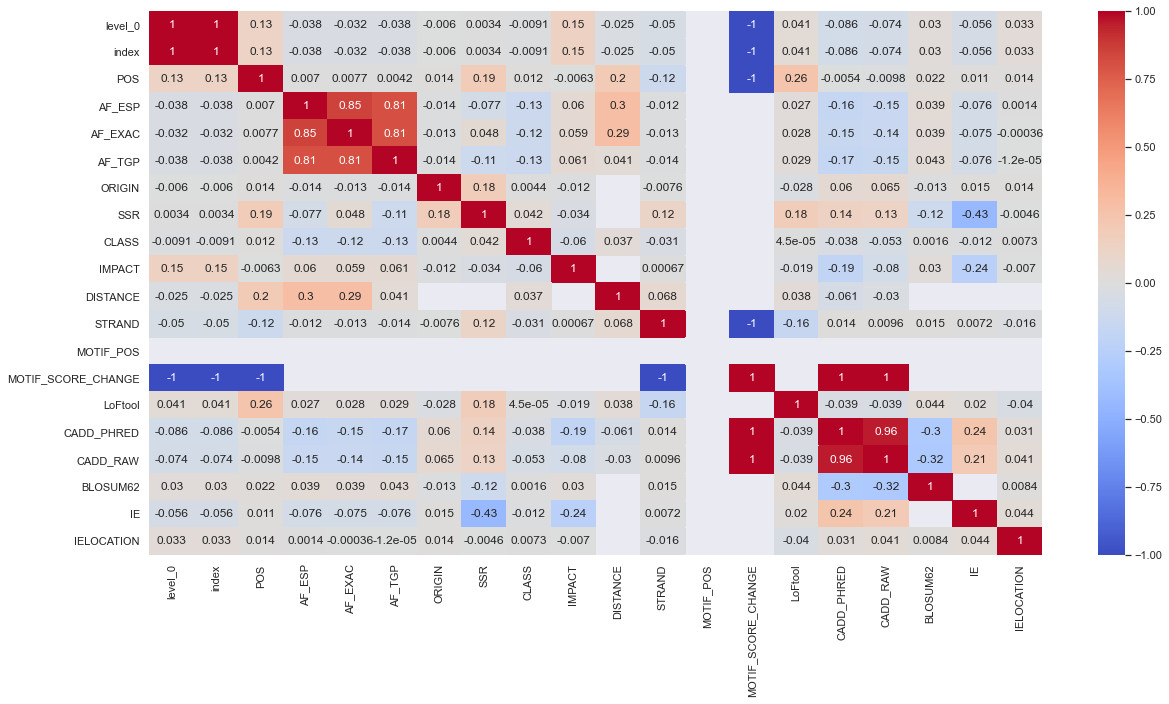

In [196]:
#Creating a final correlation matrix to identify predictive features
corr_matrix = data.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True,cmap = 'coolwarm')
sns.set(rc={'figure.figsize':(20,10)})
plt.show()

# Some Data Balancing Before Training

In [ ]:
#We are going to downsample the overrepresented class using SMOTE
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

# Some Simple ML Models (Logistic Regression, SVM, and Random Forest) 

In [33]:
#Actually implementing a simple logistic regression model from scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [101]:
#Now training a logistic regression 
relevant_features = ['POS','AF_ESP', 'AF_EXAC', 'AF_TGP', 'STRAND','LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62']
X = data.loc[:, data.loc[:,]]
y = data.loc[:, data.loc[:,'CLASS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

ValueError: Cannot index with multidimensional key

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))